Wstępna analiza danych




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fns

In [ ]:
def simple_figure(df, feature1, feature2, fsize=(30,10), marker="r."):
  #plt.figure(figsize=fsize)
  plt.plot(df[feature1], df[feature2], marker )
  plt.grid(True)
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  #plt.show()


In [ ]:
def create_subdfs_list(df: pd.DataFrame, bool_vecs: dict):
  sub_dfs= []

  for b in bool_vecs.values():
    sub_dfs.append(fns.create_subdf(df, b))
  return sub_dfs

In [ ]:
df = pd.read_csv("internet_service_churn.csv")
print(df.columns)

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
#Poprawa literówki, zmiana 'reamining_contract' na 'remaining_contract'
df.columns = ['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn']

print(df.columns)

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
df.shape

(72274, 11)

W datasecie występują 72274 próbki, które powinny mieć 11 cech. Ostatnia, czyli "churn" będzie przewidywana.

In [ ]:
types = df.dtypes
print(f"types = \n{types}")

types = 
id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
remaining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object


In [ ]:
df.describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.227400e+04      72274.000000                 72274.000000   
mean   8.463182e+05          0.815259                     0.334629   
std    4.891022e+05          0.388090                     0.471864   
min    1.500000e+01          0.000000                     0.000000   
25%    4.222165e+05          1.000000                     0.000000   
50%    8.477840e+05          1.000000                     0.000000   
75%    1.269562e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      72274.000000  72274.000000        50702.000000   
mean           2.450051     18.942483            0.716039   
std            2.034990     13.215386            0.697102   
min           -0.020000      0.000000            0.000000   
25%            0.930000     13.000000            0.000000   
50%            1.980000     19.000000            0.570000   
75%            3.300000     22.000000            1.310000   
max           12.800000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           72274.000000  71893.000000  71893.000000         72274.000000   
mean                0.274234     43.689911      4.192076             0.207613   
std                 0.816621     63.405963      9.818896             0.997123   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      6.700000      0.500000             0.000000   
50%                 0.000000     27.800000      2.100000             0.000000   
75%                 0.000000     60.500000      4.800000             0.000000   
max                19.000000   4415.200000    453.300000             7.000000   

              churn  
count  72274.000000  
mean       0.554141  
std        0.497064  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

Cechy "is_tv_subscriber", "is_movie_package_subscriber", "churn" mają wartości binarne. Można to wywnioskować z faktu, iż min=0, max=1 oraz wartości mają typ całkowity. Wobec tego średnia wartości tych cech pokazuje ile procent wszystkich próbek, ma daną cechę pozytywną. Pozostałe cechy mają wartości numeryczne, niebinarne. Wszystkie cechy mają (powinny mieć) wartość minimalną 0. Występuje jedna anomalia przy "subscription_age", min=-0.02, której odniesienie do znaczenia wskazuje na błąd. Wartości maksymalne poszczególnych cech są różnych rzędów, od 1e0 do 1e4, natomiast wartości średnie są co najwyżej rzędu 1e2. Cechy "service_failure_count", "download_avg", "upload_avg", "download_ovr_limit" wydają się zawierać outlayerów (dużo większa wartość max od mean przy stosunkowo niedużym std). Można zauważyć, że istnieją próbki z brakami w wartościach.

In [ ]:
empty_cells = {column_name: df[column_name].isna().sum() for column_name in df.columns}
print(empty_cells)

{'id': 0, 'is_tv_subscriber': 0, 'is_movie_package_subscriber': 0, 'subscription_age': 0, 'bill_avg': 0, 'remaining_contract': 21572, 'service_failure_count': 0, 'download_avg': 381, 'upload_avg': 381, 'download_over_limit': 0, 'churn': 0}


Występują nieistne braki w wartościach cech "download_avg", "upload_avg" (381 na ponad 72 tys. próbek) oraz bardzo istotne w "remaining_contact". Braki te mogą być wadą datasetu ale mogą również być konkretną informacją, typu, że klient ma umowę na czas nieokreślony albo, że korzysta na jakichś innych zasadach. Może być to, przede wszystkim informacja o tym, że może odejść w każdej chwili bez konsekwencji (typu płacenie do końca umowy).

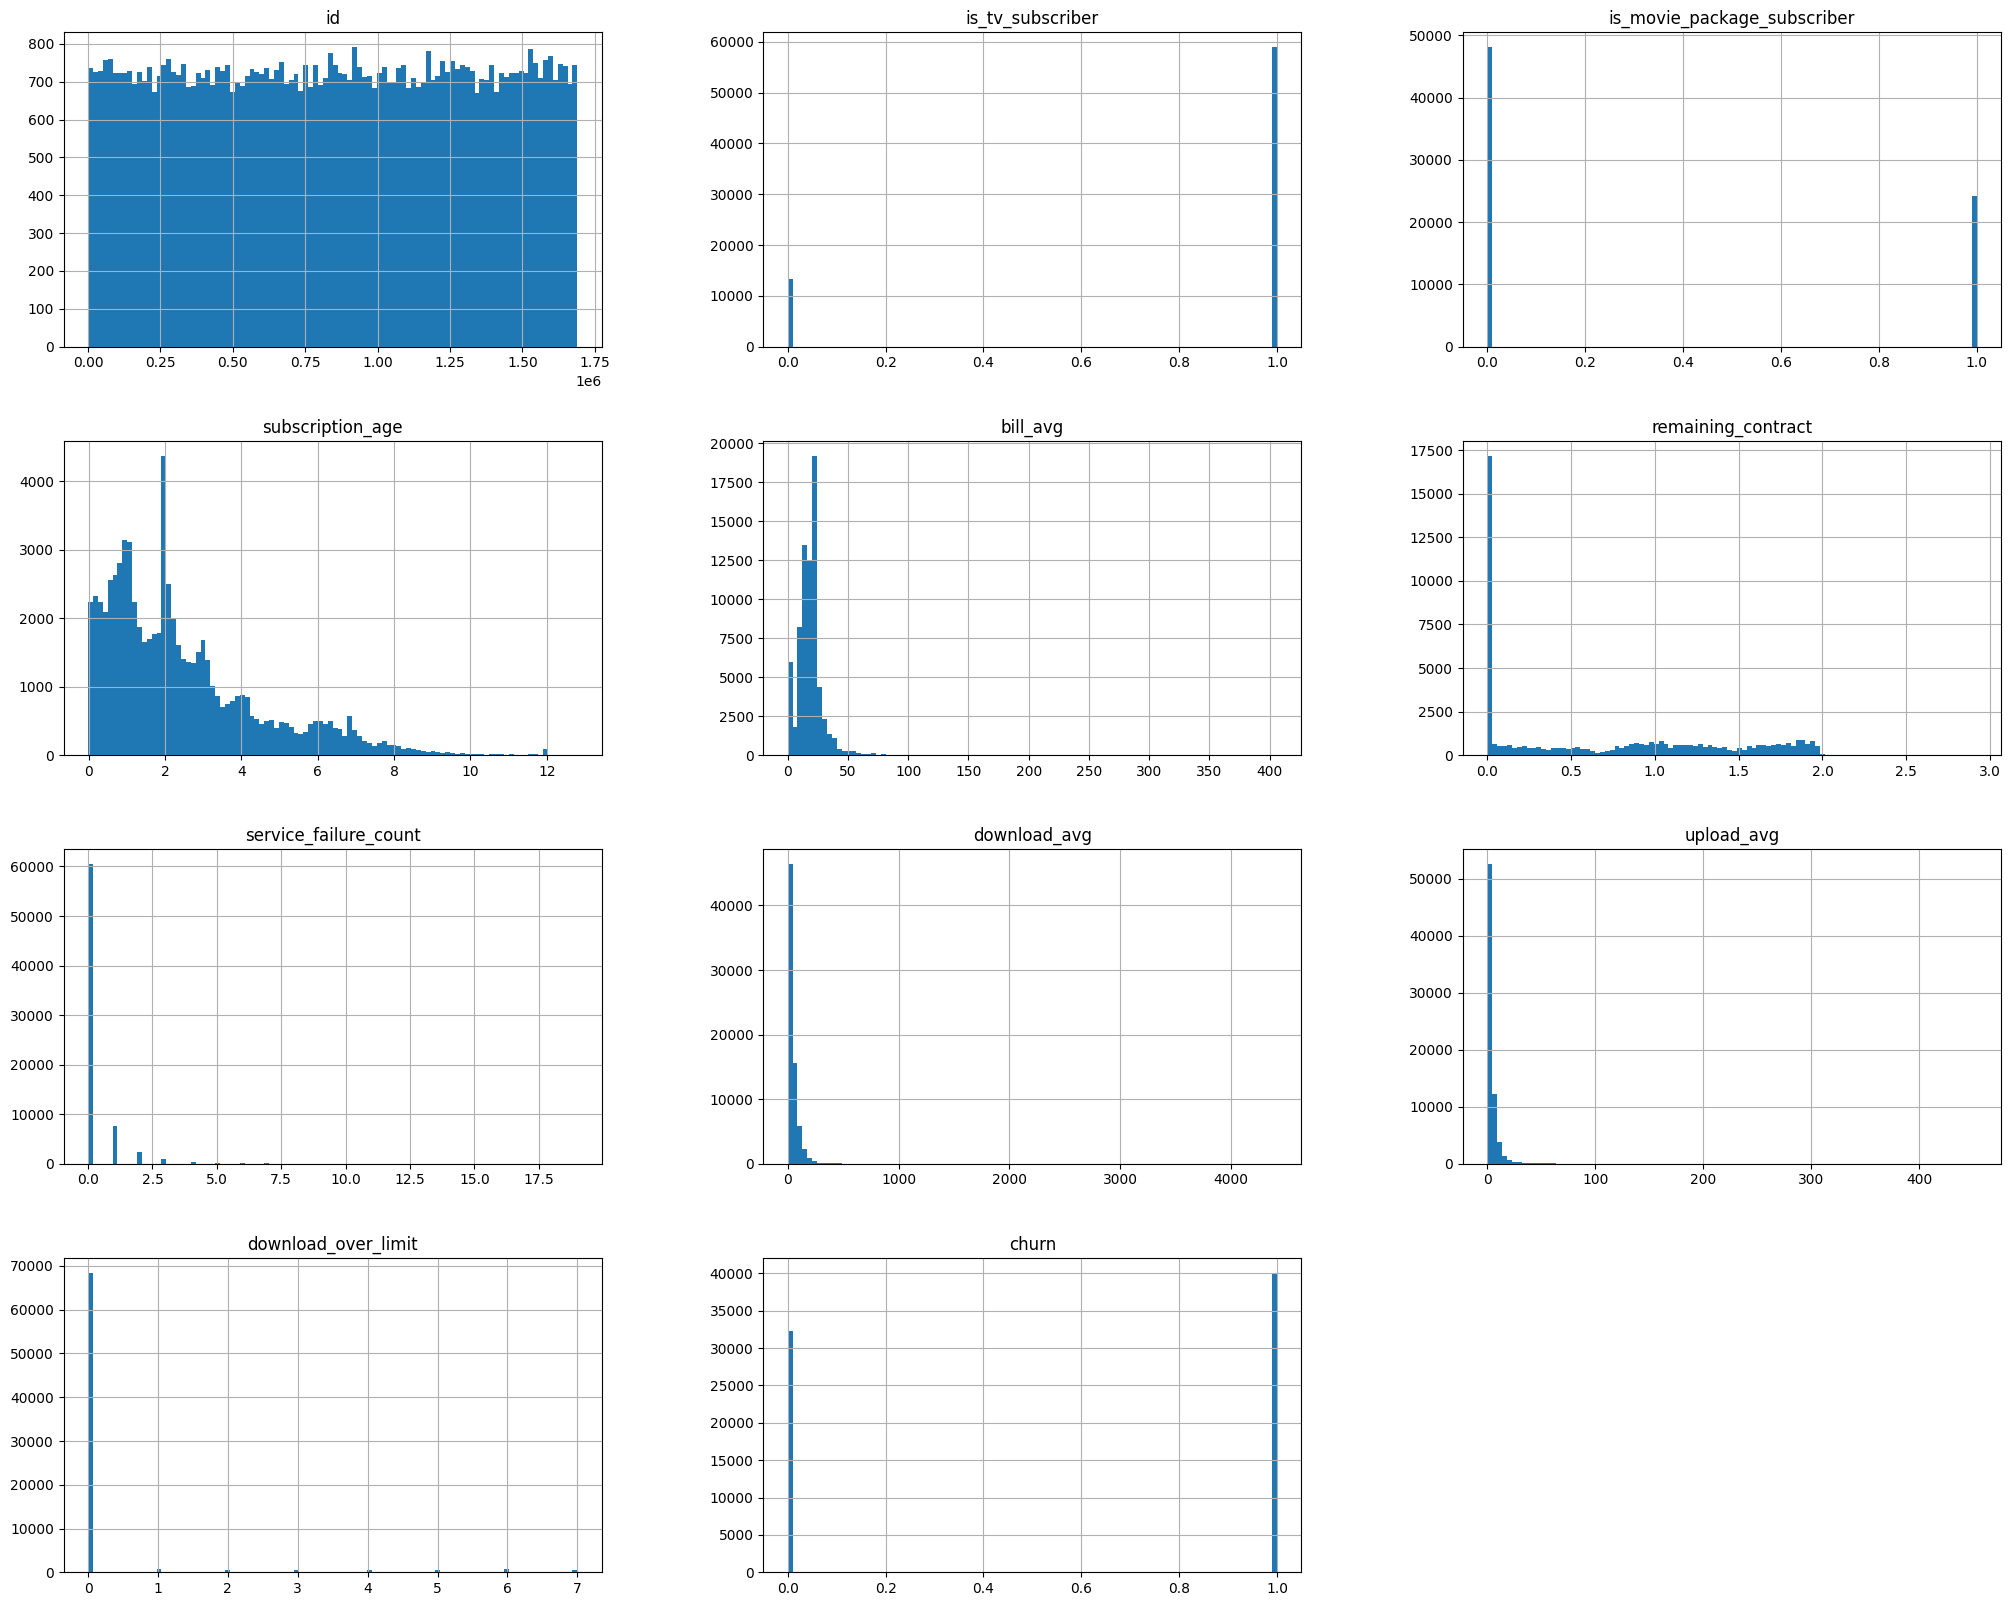

In [ ]:
df.hist(bins=100, figsize=(25, 20))
plt.show()

Z powyższych histogramów wynika, że w cechach "remaining_contract", "service_failure_count", "download_avg", "upload_avg", "download_over_limit" w większości wytępują wartości zerowe lub bliskie zeru

Ze względu na fakt, iż cecha przewidywana "churn" jest binarna, zdecydowano się przyjrzeć rozkładom wartości poszczególnych cech osobno dla zbioru próbek, dla których "churn" = 0 oraz osobno dla "churn" = 1

Z faktu iż "churn" przyjmuje wartości binarne wynika, że będziemy budować klasyfikator

In [ ]:
ch = "churn"

bool_vecs_ch = {
    "ch == 0": df[ch] == 0,
    "ch == 1": df[ch] == 1,
}

In [ ]:
sub_dfs_ch = fns.create_subdfs_list(df, bool_vecs_ch)

(32224, 11)
(40050, 11)


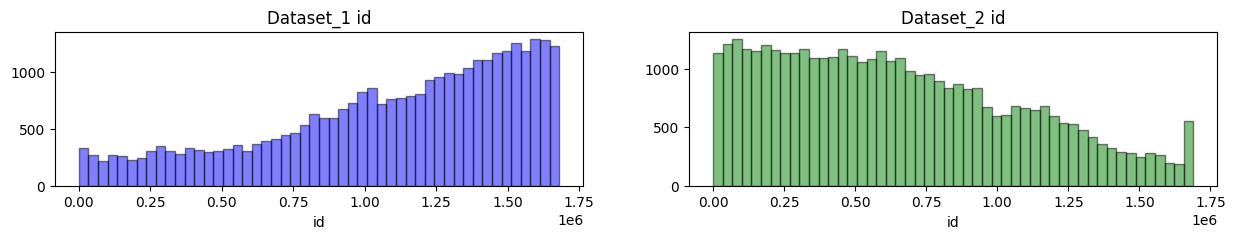

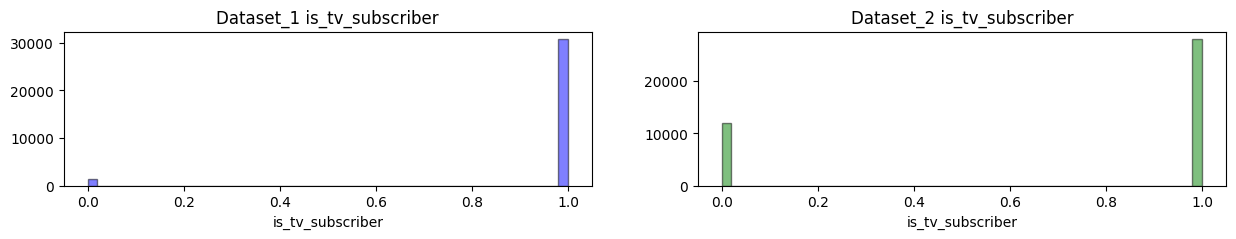

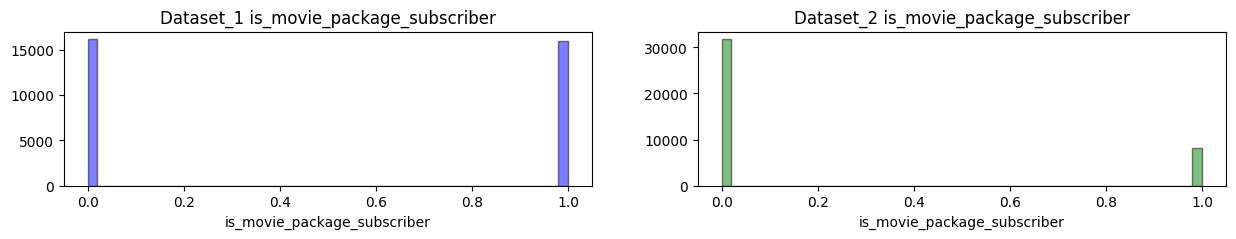

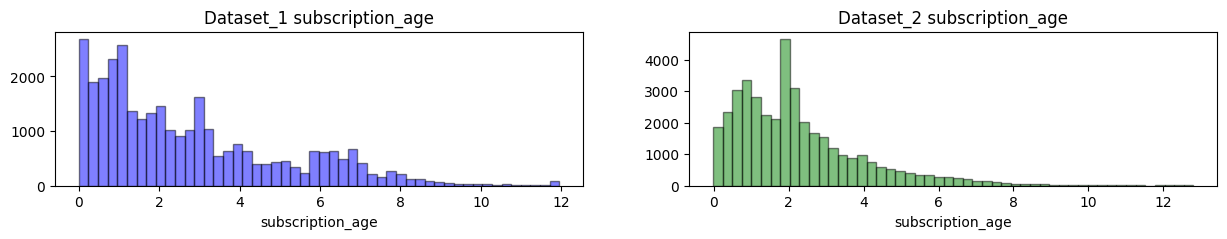

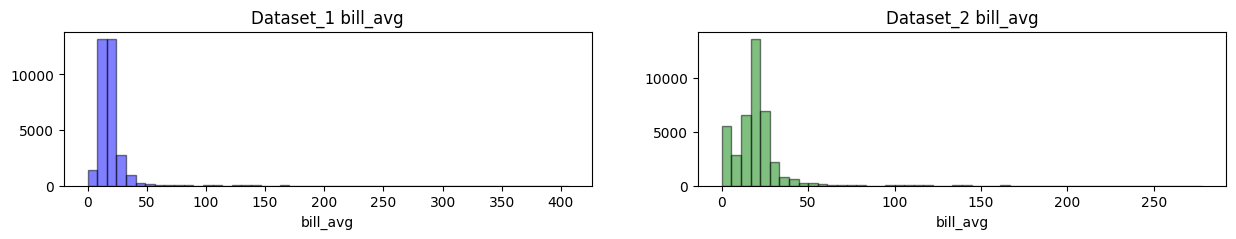

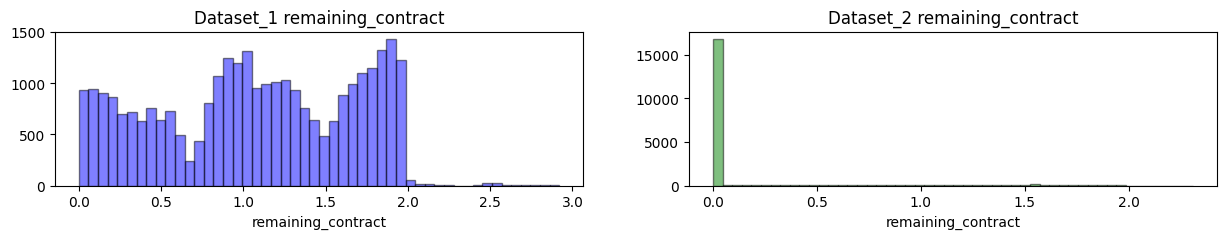

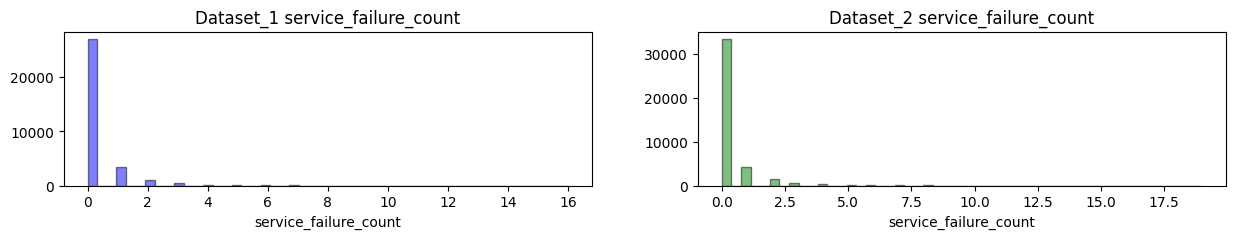

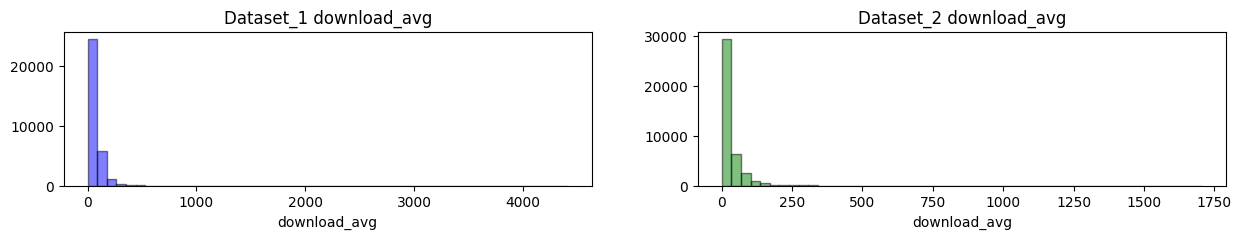

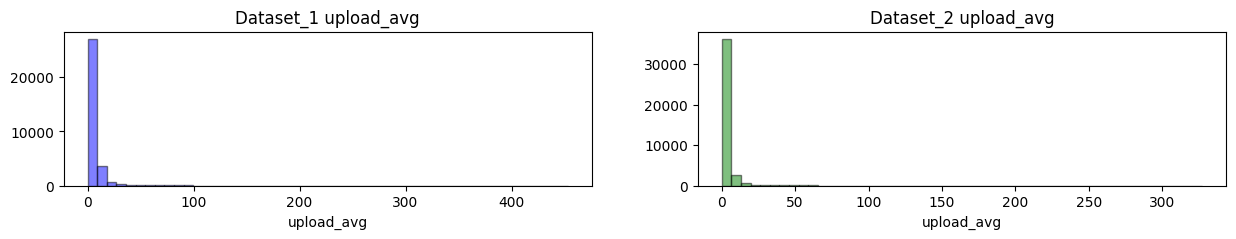

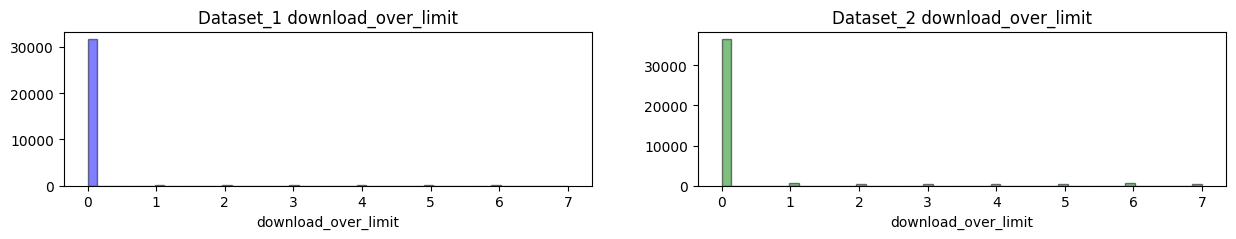

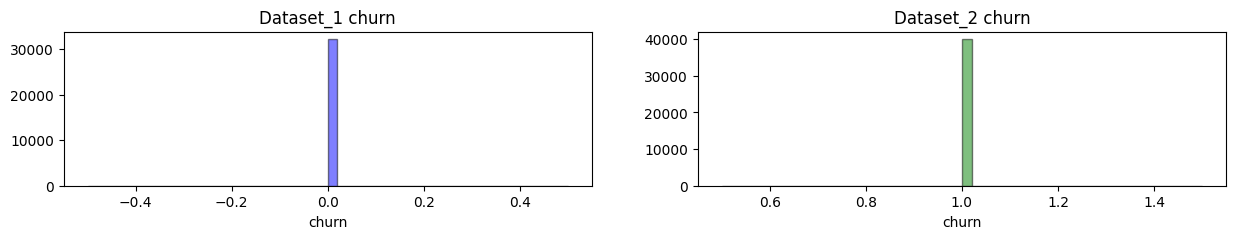

In [ ]:
fns.hist_comparison(sub_dfs_ch[0], sub_dfs_ch[1])

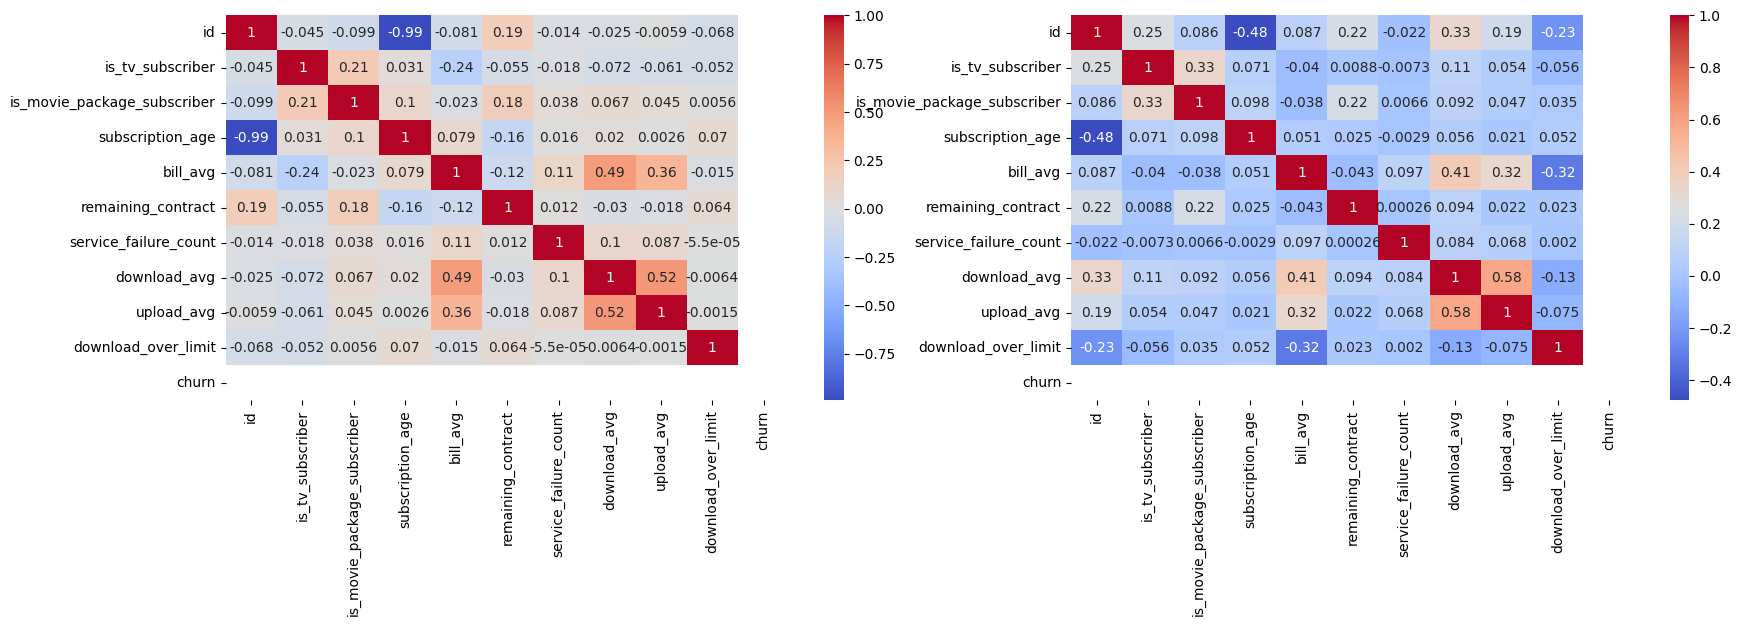

In [ ]:
fns.corr_comparison(sub_dfs_ch[0], sub_dfs_ch[1])

In [ ]:
sub_dfs_ch[0].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  3.222400e+04      32224.000000                 32224.000000   
mean   1.092310e+06          0.956989                     0.496214   
std    4.416807e+05          0.202886                     0.499993   
min    1.500000e+01          0.000000                     0.000000   
25%    8.168338e+05          1.000000                     0.000000   
50%    1.189630e+06          1.000000                     0.000000   
75%    1.459718e+06          1.000000                     1.000000   
max    1.680282e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      32224.000000  32224.000000        30371.000000   
mean           2.727828     19.252731            1.072765   
std            2.348857     13.382995            0.594408   
min            0.000000      0.000000            0.000000   
25%            0.880000     13.000000            0.560000   
50%            2.050000     18.000000            1.080000   
75%            4.030000     22.000000            1.620000   
max           11.950000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           32224.000000  31843.000000  31843.000000         32224.000000   
mean                0.254593     64.884728      5.983563             0.031622   
std                 0.751527     74.788156     11.522778             0.322663   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000     26.000000      1.900000             0.000000   
50%                 0.000000     48.800000      3.700000             0.000000   
75%                 0.000000     84.100000      6.700000             0.000000   
max                16.000000   4415.200000    453.300000             7.000000   

         churn  
count  32224.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [ ]:
sub_dfs_ch[1].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  4.005000e+04      40050.000000                 40050.000000   
mean   6.483943e+05          0.701223                     0.204619   
std    4.322926e+05          0.457727                     0.403428   
min    1.800000e+01          0.000000                     0.000000   
25%    2.863745e+05          0.000000                     0.000000   
50%    5.907300e+05          1.000000                     0.000000   
75%    9.498655e+05          1.000000                     0.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      40050.000000  40050.000000        20331.000000   
mean           2.226554     18.692859            0.183152   
std            1.709438     13.073794            0.458280   
min           -0.020000      0.000000            0.000000   
25%            0.980000     13.000000            0.000000   
50%            1.970000     20.000000            0.000000   
75%            2.940000     23.000000            0.000000   
max           12.800000    278.000000            2.310000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           40050.000000  40050.000000  40050.000000         40050.000000   
mean                0.290037     26.838312      2.767698             0.349213   
std                 0.865134     46.137197      7.932245             1.290545   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      0.000000      0.000000             0.000000   
50%                 0.000000     11.900000      0.900000             0.000000   
75%                 0.000000     36.700000      2.900000             0.000000   
max                19.000000   1706.200000    327.200000             7.000000   

         churn  
count  40050.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

Porównanie map współczynników korelacji.


Wśród klientów będących dalej w systemie ("churn" = 0) "subscription_age" jest odwrotnie proborcjonalne do "id" (-0.99), wśród klientów, którzy odeszli corr jest znacznie modulo mniejszy. Wynika z tego, że "subscription_age" zostaje "zamrożony" w momencie odejscia, czyli nie jest to czas liczony od momentu zapisania się do teraz, tylko od momentu zapisania się, do teraz, w przypadku aktywnej subskrypcji i od momentu zapisania się do wypisania w przypadku przeciwnym.

Powyższe histogramy przedstawiono ponownie, z uwzględnieniem na nich wartości NaN

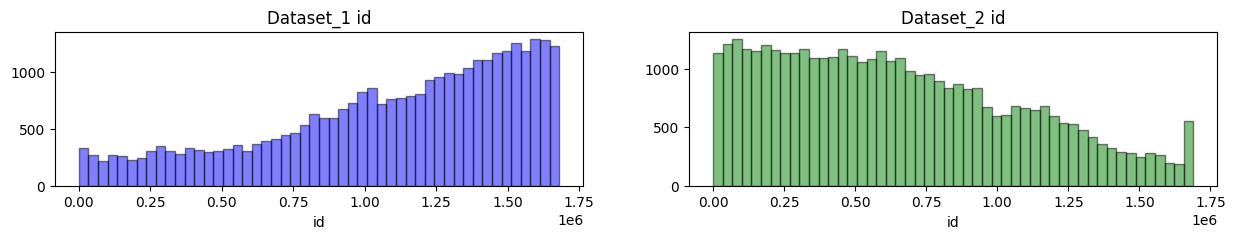

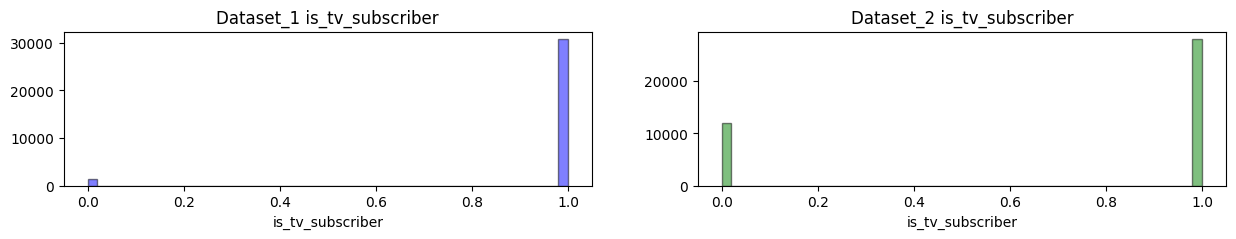

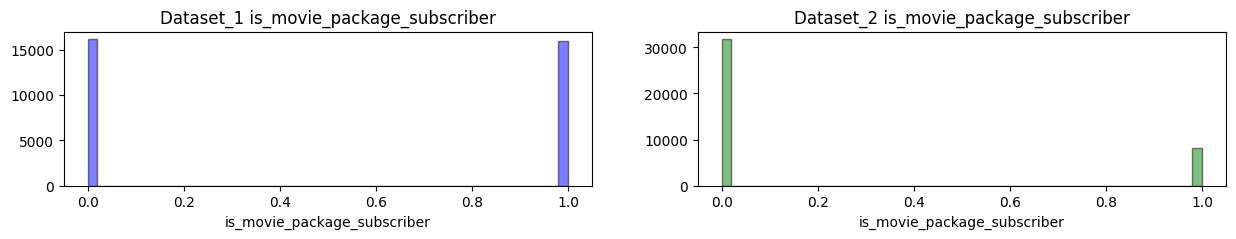

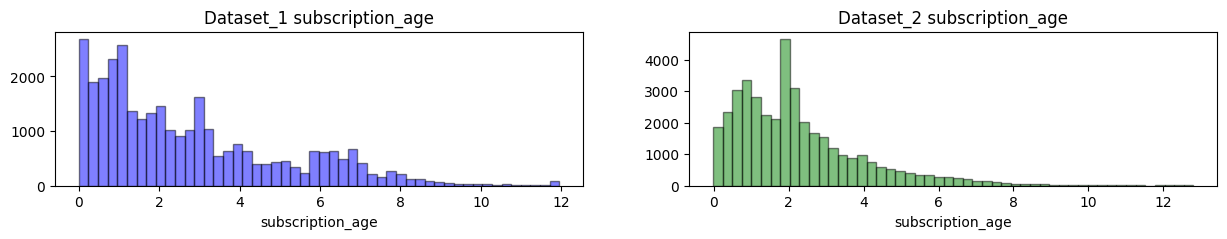

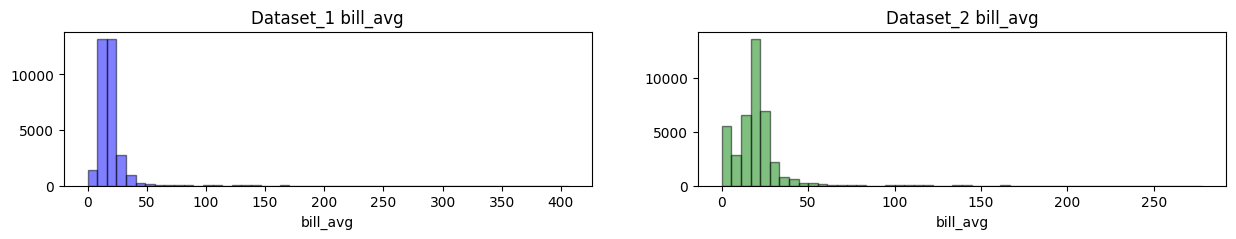

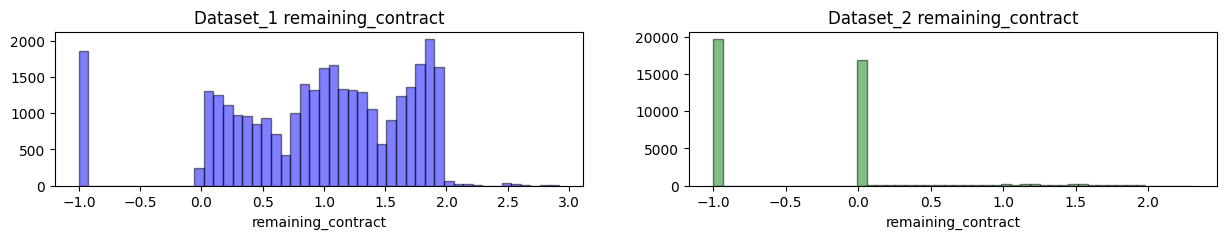

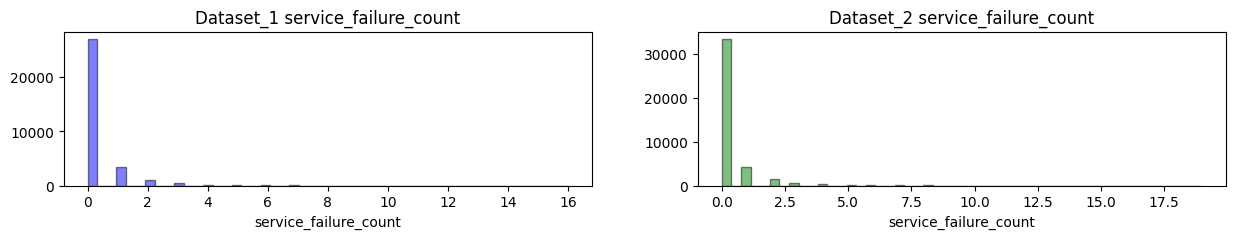

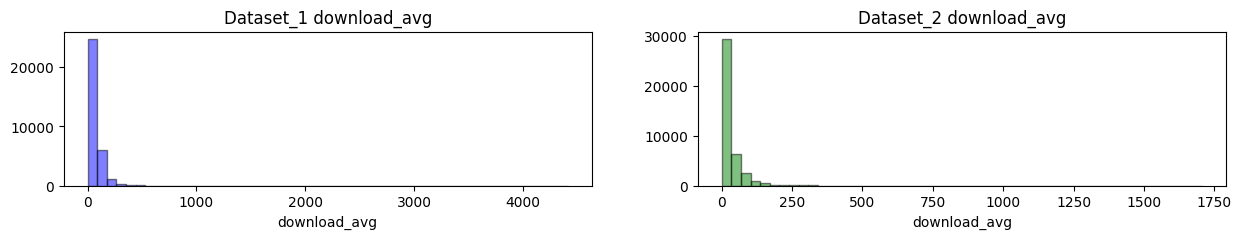

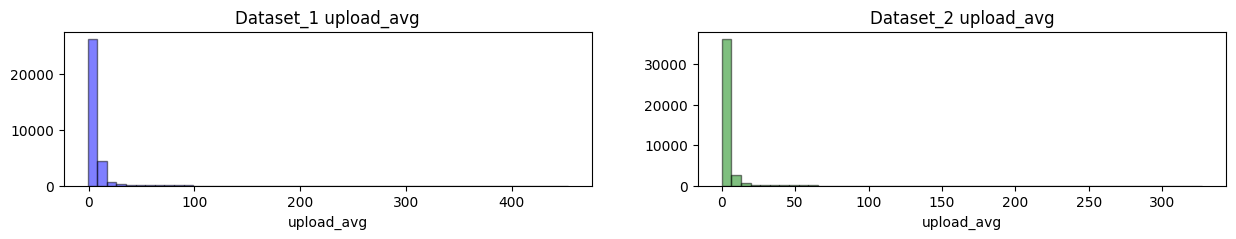

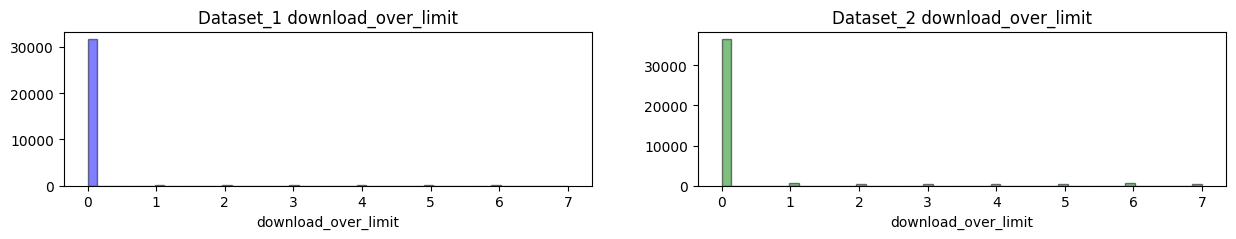

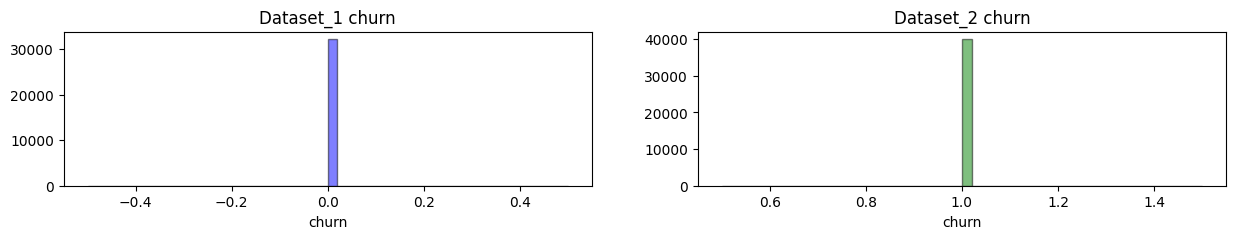

In [ ]:
fns.hist_comparison(sub_dfs_ch[0].fillna(-1), sub_dfs_ch[1].fillna(-1))

Można się spodziewać, że cechy, których rozkłady są najmniej podobne dla obu podzbiorów, będą miały decydujący wpływ na "churn". Wygląda na to, że będą to "id" (?!), "is_tv_subscriber", "is_movie_package_subscriber", "subcription_age",a przede wszystkim "remaining_contract".

Można dostrzec też ciekawą zależność dotyczącą "remainig_contract". Pomijając NaNy, mamy zdecydowaną przewagę próbek o wartościach >0 w grubie "churn" = 0 oraz zdecydowaną przewagę próbek =0 w grupie "churn" = 1. Wydaje się to dość naturalne, z uwagi na fakt, że klienci, którzy odchodzą, zazwyczaj robią to w momencie, gdy kończy im się umowa z serwisem.





Poniżej przedstawiono "heatmapę", na której znajdują się wartości współczynników korelacji.:

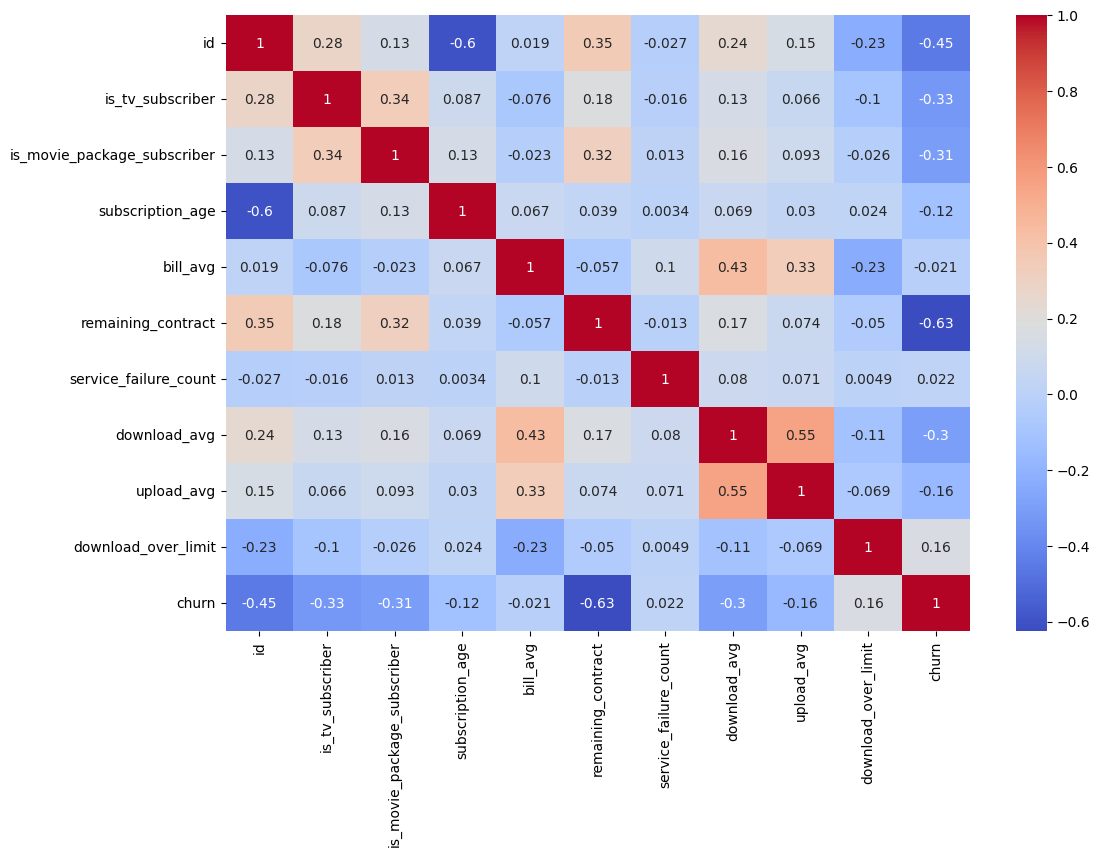

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Korelacje z churnem:

Najsilniejsza negatywna korelacja (-0.63) występuje między churnem, a remaining_contract. Wynika z tego, że klienci z dłuższym pozostałym okresem umowy są mniej skłonni do rezygnacji. Następna w kolejności jest negatywna koralacja z "id".
Umiarkowane negatywne korelacje z churnem mają: is_tv_subscriber (-0.33) i is_movie_package_subscriber (-0.31).Posiadanie dodatkowych usług może zmniejszać ryzyko churnu.
Słaba pozytywna korelacja (0.16) z download_over_limit sugeruje, że przekraczanie limitów może tylko nieznacznie zwiększać ryzyko churnu.

Cechy "bill_avg" oraz "service_failure_count" wydają się nie mieć wpływu na "churn". Sensowne będzie zatem usunięcie odpowiadających im kolumn z datasetu w celu uproszczenia modelu.

Uproszczenie modelu niesie za sobą pewne zalety:
- mniej stopni swobody oznacza mniejszą podatność na overfitting
- trenowanie modelu jest mniej kosztowne

Korelacje pomiędzy pozostałymi cechami:
Najsilniejsza jest korelacja pomiędzy cechami 'download_avg' i 'upload_avg'ale nie wydaje się wystarczająco silna aby którąś z cech pominąć.

Pytanie, czy budując model na podsatwie cech o najwyższych korelacjach (w tym wypadku negatywnych - "remaining_contract" i "id") nie wpadniemy w pułapkę, że nasz model będzie trafnie przewidywał przynależność próbek znajdujących się w tym datasecie, a będzie miał bardzo słabą skuteczność w przewidywaniu próbek przyszłych. Takie modele mimo wszystko zostaną zbudowane, zgodnie z koncepcją, że parzymy na cechy i ich wartości jako takie, nie uwzględniając ich ewentualnej intrerpretacji.


 Poniżej analiza danych z podziałem datasetu, w zależności od zawartości pola 'remaining contract'  



In [ ]:
rc = "remaining_contract"

In [ ]:
bool_vecs_rc = {
            "rc > 0": df[rc] > 0,
             "rc = 0": df[rc] == 0,
             "rc = NaN": df[rc].isna(),
             "rc >= 0": df[rc] >= 0,
            }

In [ ]:


sub_dfs_rc = create_subdfs_list(df, bool_vecs_rc)

(34339, 11)
(16363, 11)
(21572, 11)
(50702, 11)


In [ ]:
sub_dfs_rc[0].describe() # "rc > 0"

id  is_tv_subscriber  is_movie_package_subscriber  \
count  3.433900e+04      34339.000000                 34339.000000   
mean   1.093065e+06          0.949096                     0.500597   
std    4.561236e+05          0.219805                     0.500007   
min    1.500000e+01          0.000000                     0.000000   
25%    8.056685e+05          1.000000                     0.000000   
50%    1.210138e+06          1.000000                     1.000000   
75%    1.473412e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      34339.000000  34339.000000        34339.000000   
mean           2.551931     18.232884            1.057242   
std            2.276445      9.696433            0.597308   
min           -0.020000      0.000000            0.010000   
25%            0.800000     13.000000            0.540000   
50%            1.830000     17.000000            1.070000   
75%            3.710000     22.000000            1.600000   
max           12.760000    386.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           34339.000000  34012.000000  34012.000000         34339.000000   
mean                0.260666     61.193626      5.608538             0.049419   
std                 0.774051     62.934963     10.814591             0.443471   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000     23.800000      1.700000             0.000000   
50%                 0.000000     46.500000      3.600000             0.000000   
75%                 0.000000     81.700000      6.500000             0.000000   
max                16.000000   4415.200000    453.300000             7.000000   

              churn  
count  34339.000000  
mean       0.117650  
std        0.322198  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
sub_dfs_rc[1].describe() #"rc = 0"

id  is_tv_subscriber  is_movie_package_subscriber  \
count  1.636300e+04      16363.000000                 16363.000000   
mean   7.615622e+05          0.777425                     0.185296   
std    3.782533e+05          0.415988                     0.388549   
min    2.300000e+01          0.000000                     0.000000   
25%    4.674500e+05          1.000000                     0.000000   
50%    7.499450e+05          1.000000                     0.000000   
75%    1.050902e+06          1.000000                     0.000000   
max    1.687454e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      16363.000000  16363.000000             16363.0   
mean           1.765353     18.398215                 0.0   
std            1.568404     10.913337                 0.0   
min            0.000000      0.000000                 0.0   
25%            0.710000     13.000000                 0.0   
50%            1.300000     19.000000                 0.0   
75%            2.090000     22.000000                 0.0   
max           11.420000    245.000000                 0.0   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           16363.000000  16363.000000  16363.000000         16363.000000   
mean                0.301106     30.392886      3.192465             0.127605   
std                 0.865318     45.121514      8.435582             0.751056   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      1.100000      0.100000             0.000000   
50%                 0.000000     17.400000      1.200000             0.000000   
75%                 0.000000     43.100000      3.400000             0.000000   
max                18.000000   1470.300000    318.700000             7.000000   

             churn  
count  16363.00000  
mean       0.99560  
std        0.06619  
min        0.00000  
25%        1.00000  
50%        1.00000  
75%        1.00000  
max        1.00000

In [ ]:
sub_dfs_rc[2].describe() # "rc = NaN"

id  is_tv_subscriber  is_movie_package_subscriber  \
count  2.157200e+04      21572.000000                 21572.000000   
mean   5.178292e+05          0.630910                     0.183710   
std    3.892458e+05          0.482569                     0.387257   
min    1.800000e+01          0.000000                     0.000000   
25%    1.841980e+05          0.000000                     0.000000   
50%    4.485905e+05          1.000000                     0.000000   
75%    7.630318e+05          1.000000                     0.000000   
max    1.689600e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      21572.000000  21572.000000                 0.0   
mean           2.807239     20.484888                 NaN   
std            1.805538     18.486054                 NaN   
min            0.000000      0.000000                 NaN   
25%            1.910000     13.000000                 NaN   
50%            2.310000     21.000000                 NaN   
75%            3.550000     24.000000                 NaN   
max           12.800000    406.000000                 NaN   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           21572.000000  21518.000000  21518.000000         21572.000000   
mean                0.275450     26.134511      2.713310             0.520119   
std                 0.843656     68.532786      8.776637             1.564586   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      0.000000      0.000000             0.000000   
50%                 0.000000      9.100000      0.700000             0.000000   
75%                 0.000000     30.300000      2.500000             0.000000   
max                19.000000   3890.800000    280.700000             7.000000   

              churn  
count  21572.000000  
mean       0.914102  
std        0.280220  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
sub_dfs_rc[3].describe() # rc >= 0

id  is_tv_subscriber  is_movie_package_subscriber  \
count  5.070200e+04      50702.000000                 50702.000000   
mean   9.860793e+05          0.893693                     0.398840   
std    4.594533e+05          0.308234                     0.489665   
min    1.500000e+01          0.000000                     0.000000   
25%    6.256515e+05          1.000000                     0.000000   
50%    1.033207e+06          1.000000                     0.000000   
75%    1.384116e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      50702.000000  50702.000000        50702.000000   
mean           2.298080     18.286241            0.716039   
std            2.106847     10.105378            0.697102   
min           -0.020000      0.000000            0.000000   
25%            0.760000     13.000000            0.000000   
50%            1.600000     18.000000            0.570000   
75%            3.160000     22.000000            1.310000   
max           12.760000    386.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           50702.000000  50375.000000  50375.000000         50702.000000   
mean                0.273717     51.188812      4.823740             0.074652   
std                 0.804851     59.527979     10.166523             0.562646   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000     14.600000      1.000000             0.000000   
50%                 0.000000     37.200000      2.800000             0.000000   
75%                 0.000000     70.400000      5.600000             0.000000   
max                18.000000   4415.200000    453.300000             7.000000   

              churn  
count  50702.000000  
mean       0.400990  
std        0.490104  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

Z powyższych tabel można odczytać, że wśród klientów, u których pozostały okres umowy ('remaining_contract') jest równy 0, prawie 100%, to klienci którzy odeszli. Jeśli komuś skończyła się umowa i jej nie przedłużył, to znaczy, nie nabył nowego okresu umowy, to jest "odejśnięty" (:D). Te 0,0044 % pozostałych prawdopodobnie można interpretować jako klientów, których umowa wygasa w dniu, w którym ostatni raz została uaktualniona baza i jeszcze jej nie przedłużyli ale też jeszcze nie odeszli.


... CDN ....

rc > 0 vs rc = 0

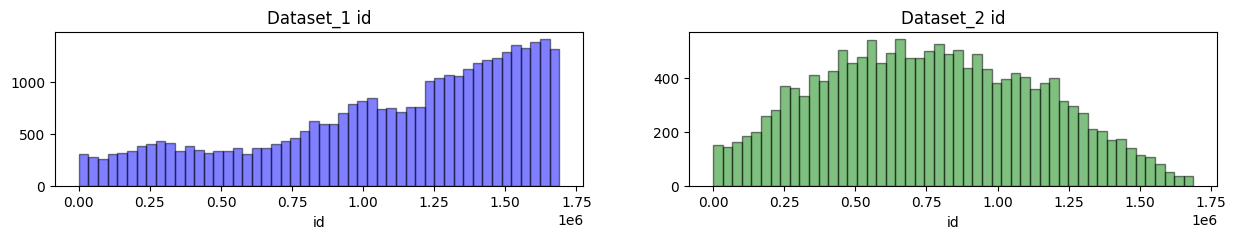

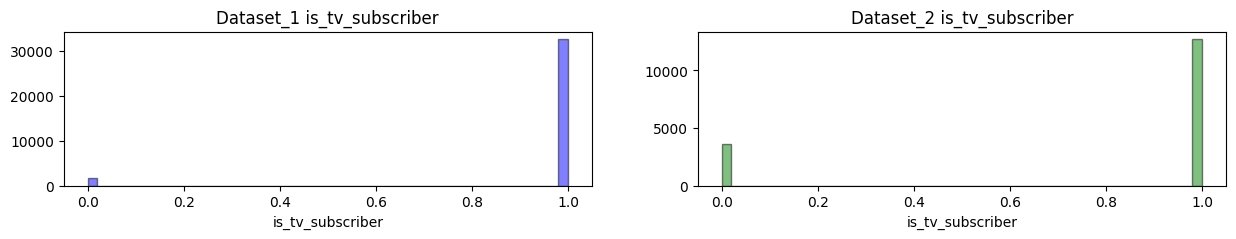

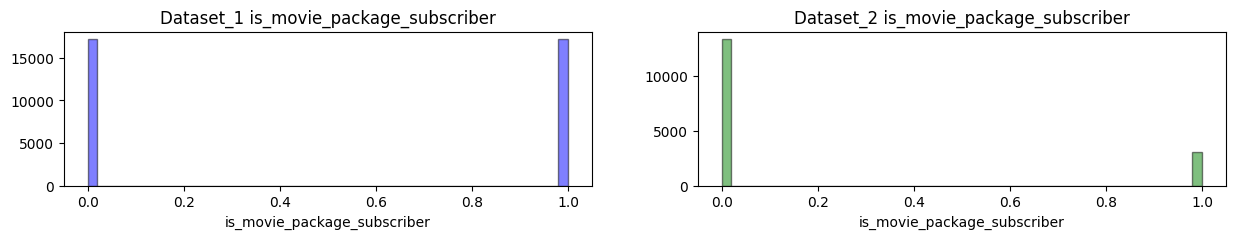

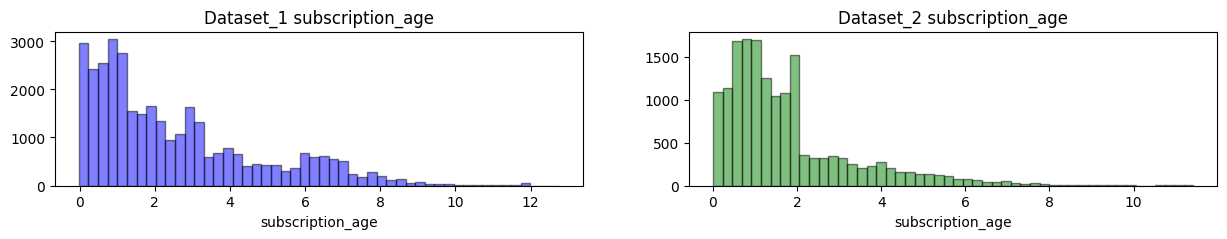

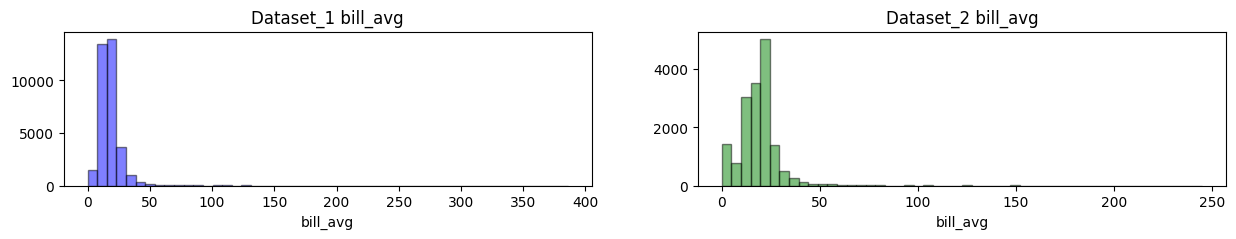

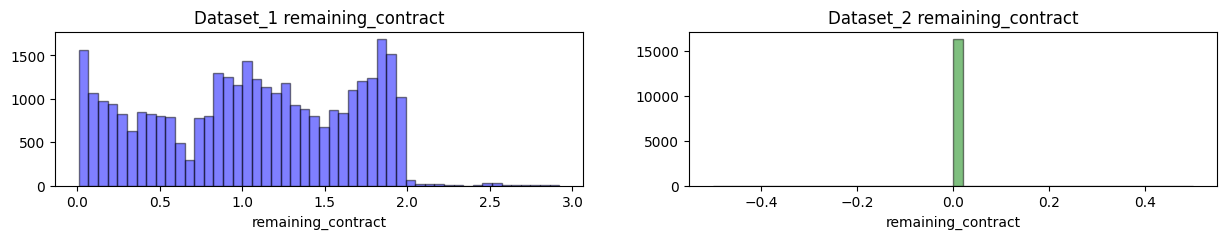

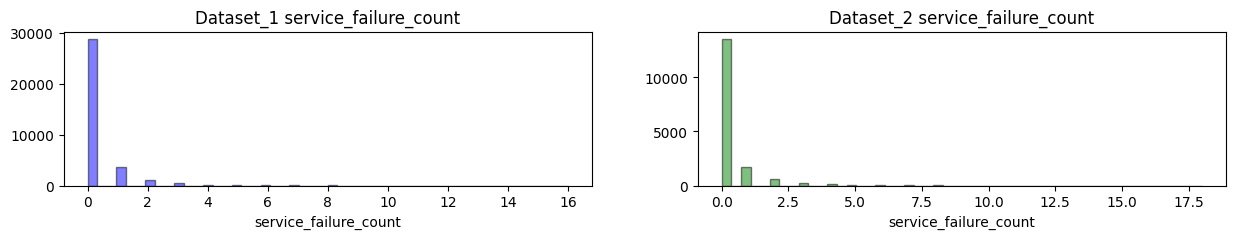

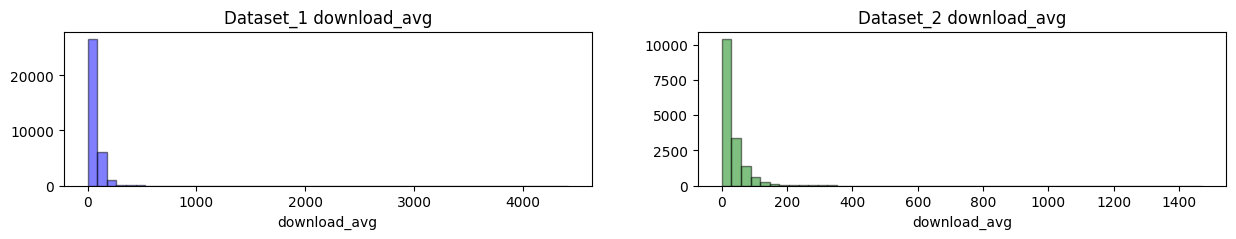

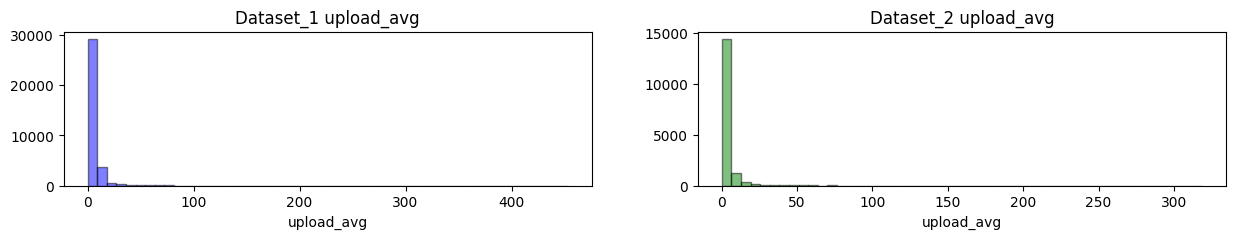

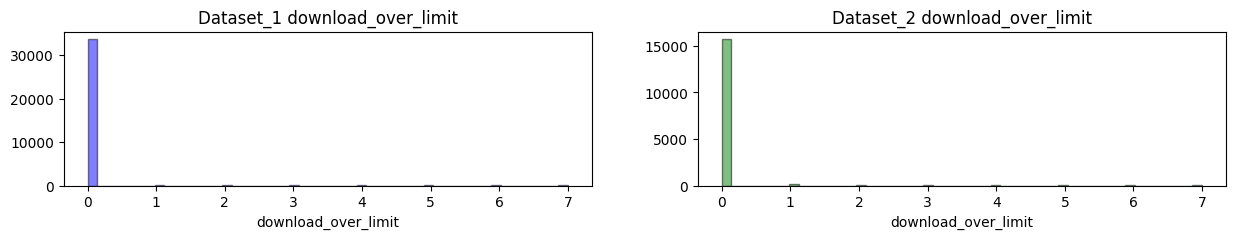

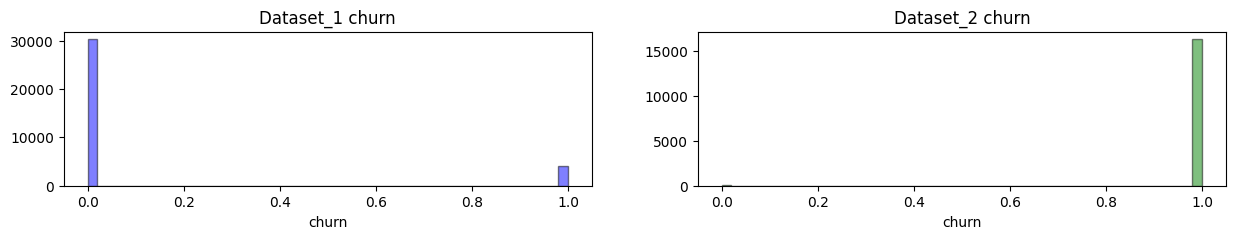

In [ ]:
fns.hist_comparison(sub_dfs_rc[0], sub_dfs_rc[1])

rc = NaN vs rc != NaN



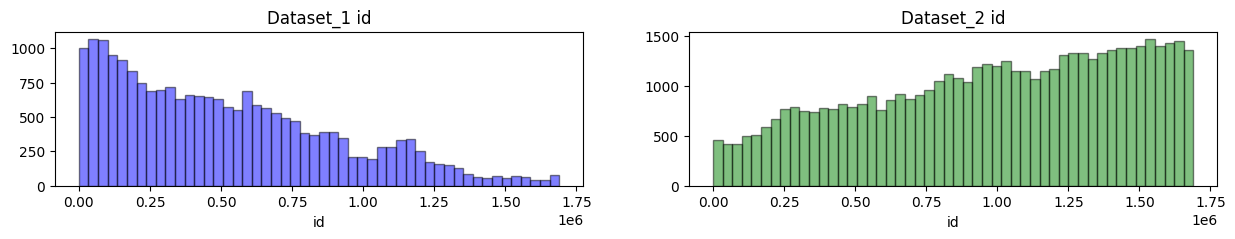

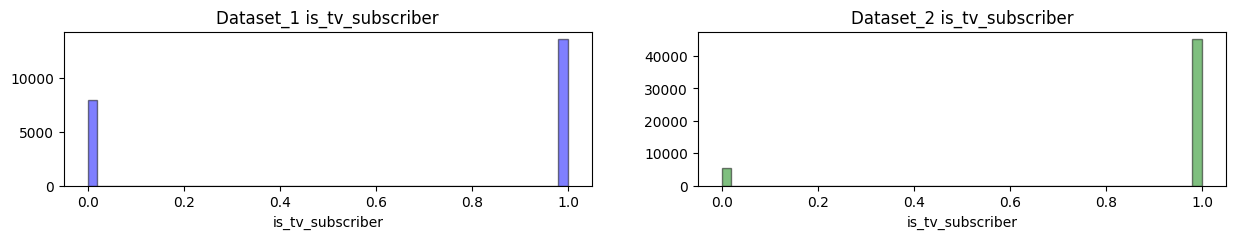

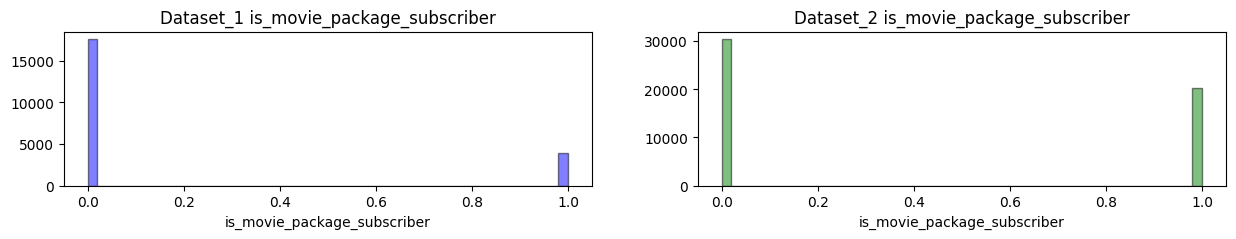

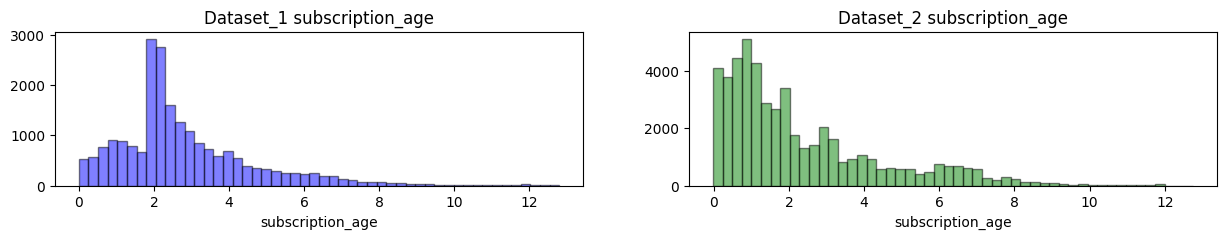

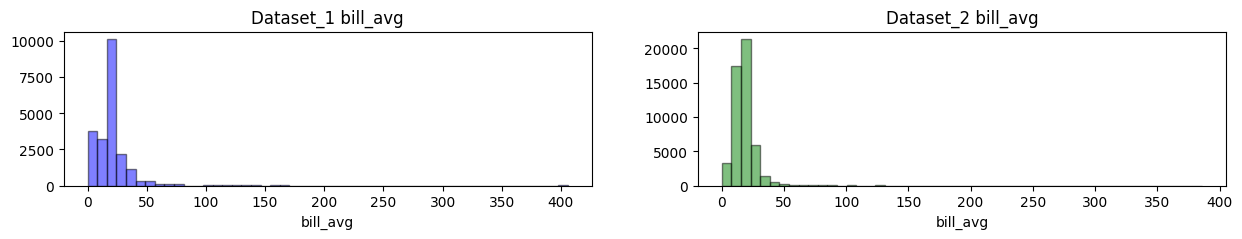

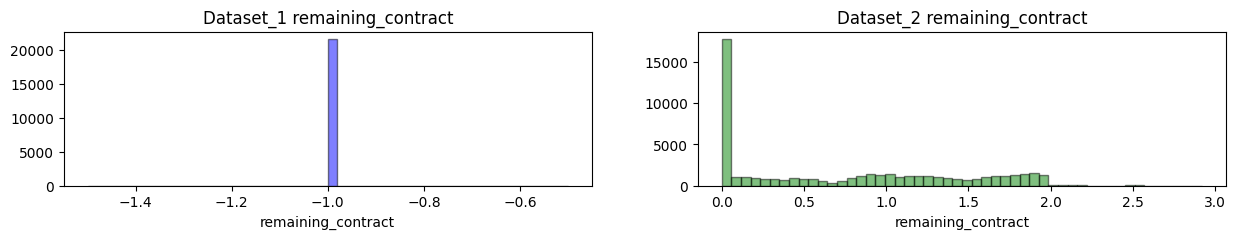

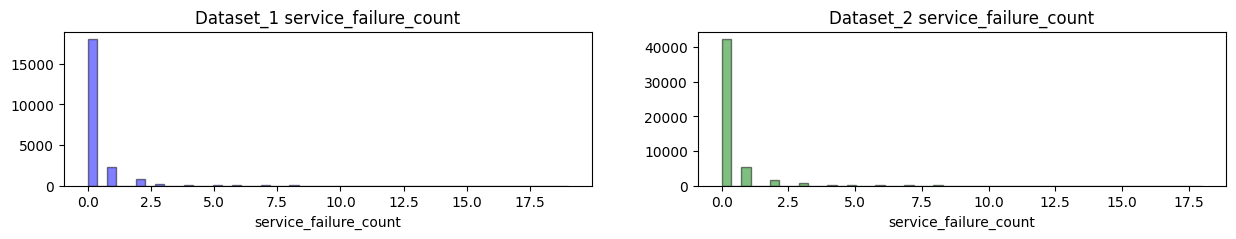

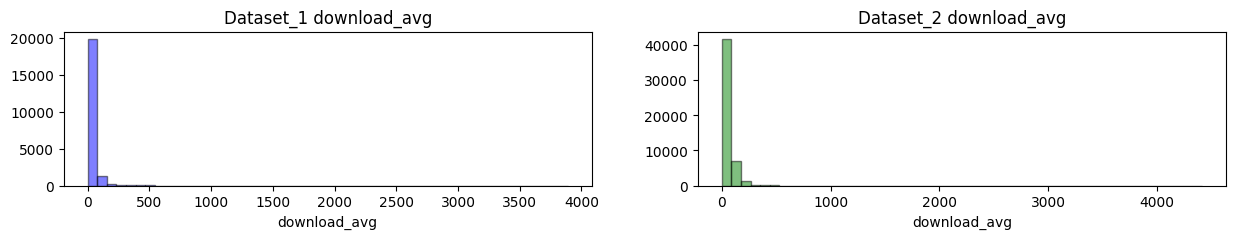

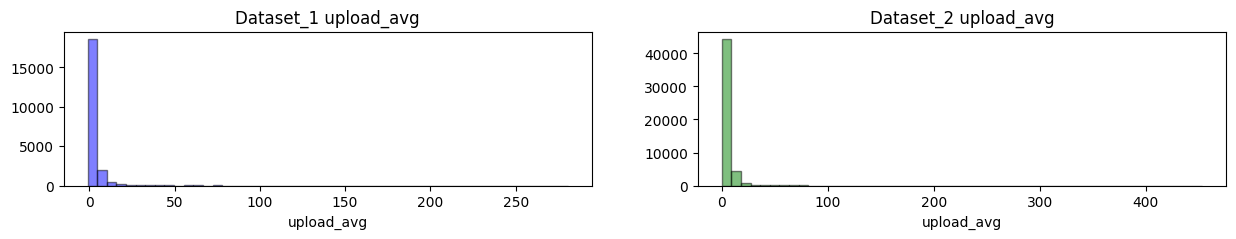

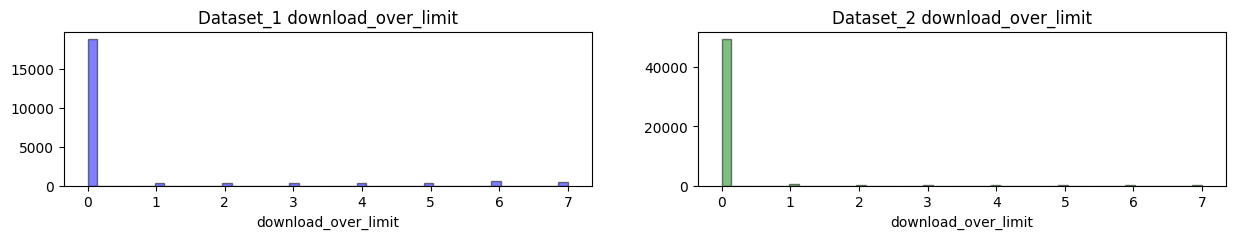

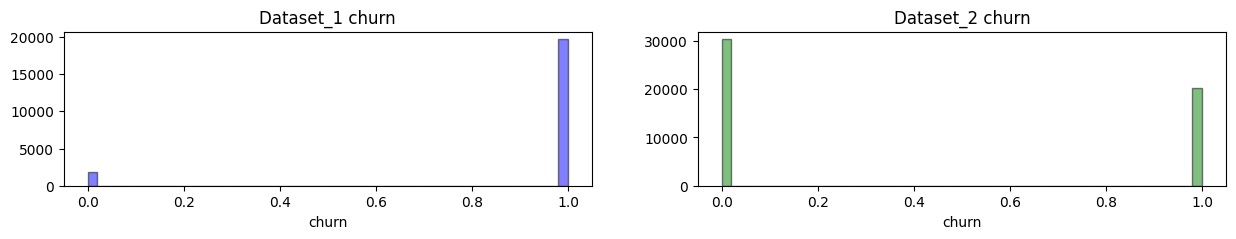

In [ ]:
fns.hist_comparison(sub_dfs_rc[2].fillna(-1), sub_dfs_rc[3])

Przegląd poszczególnych próbek, czyli "id" vs others

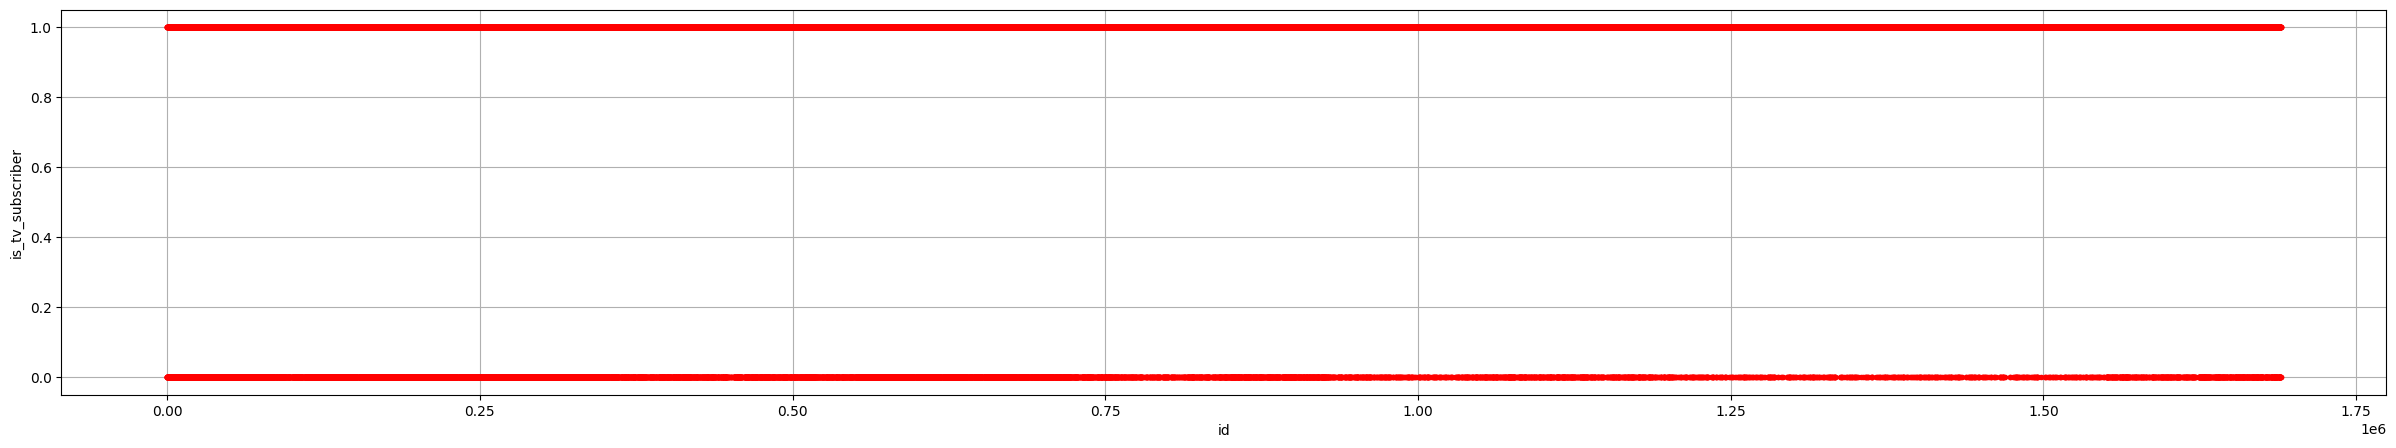

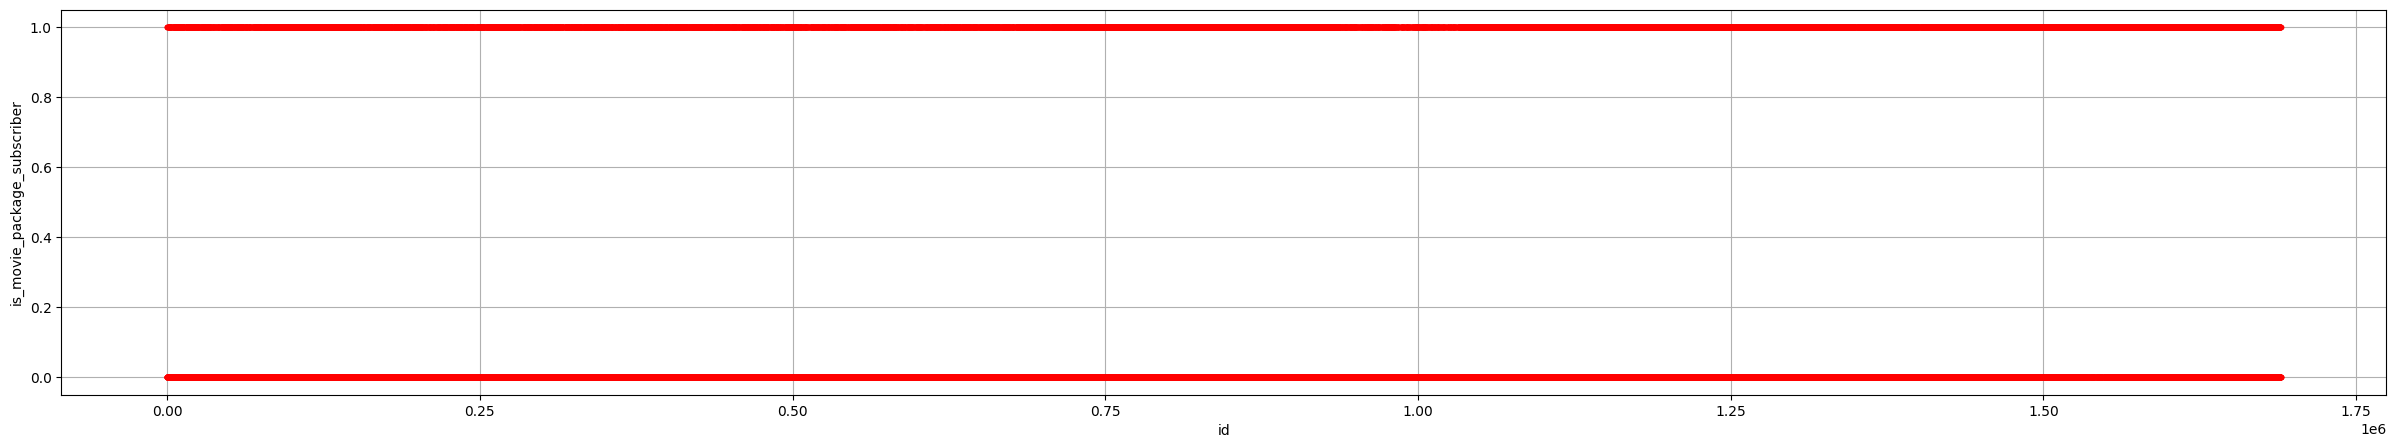

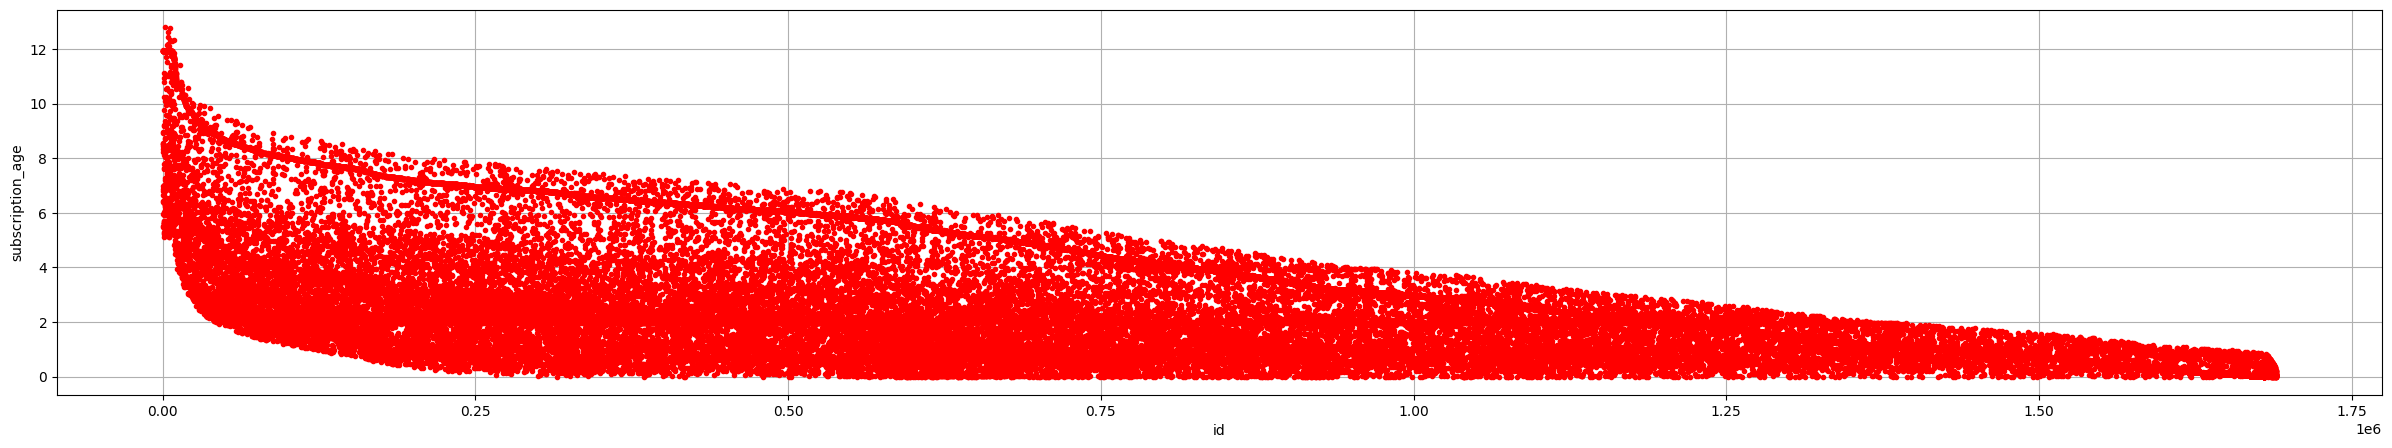

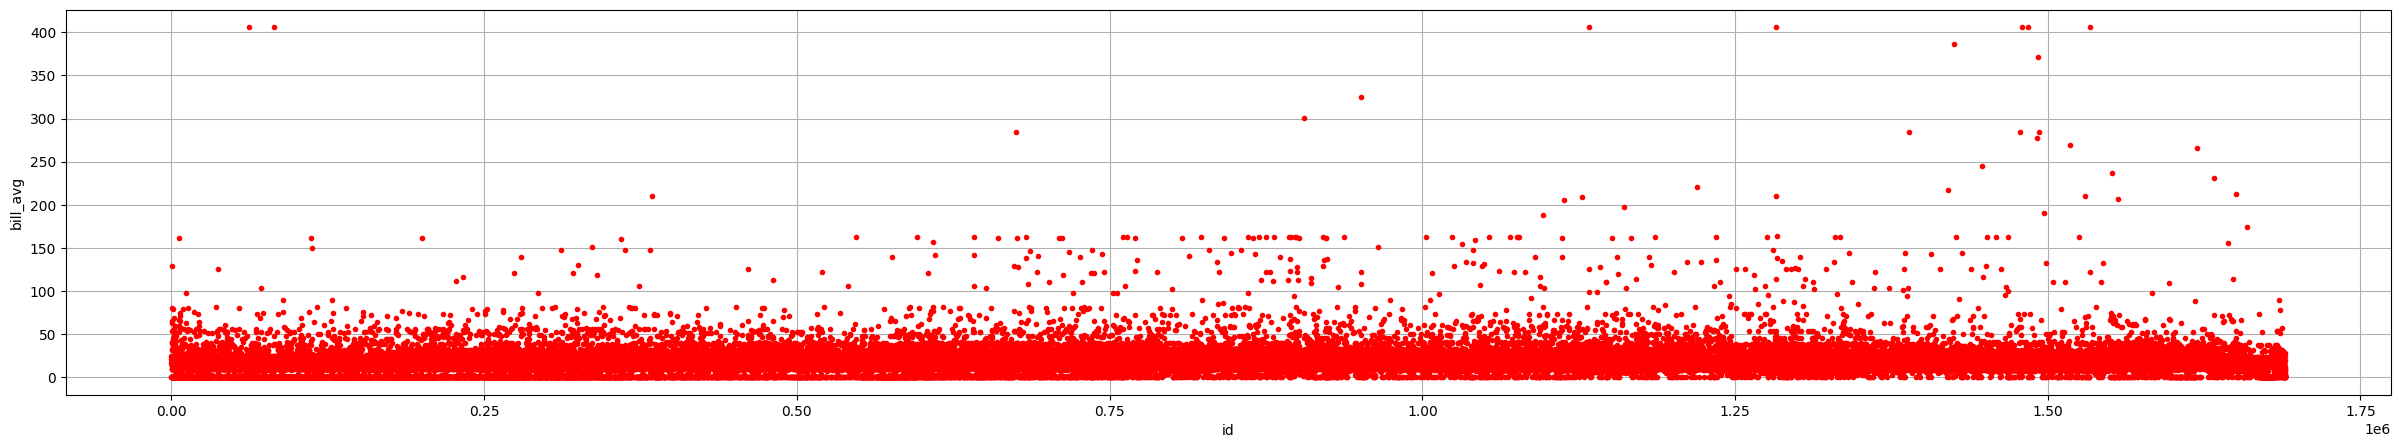

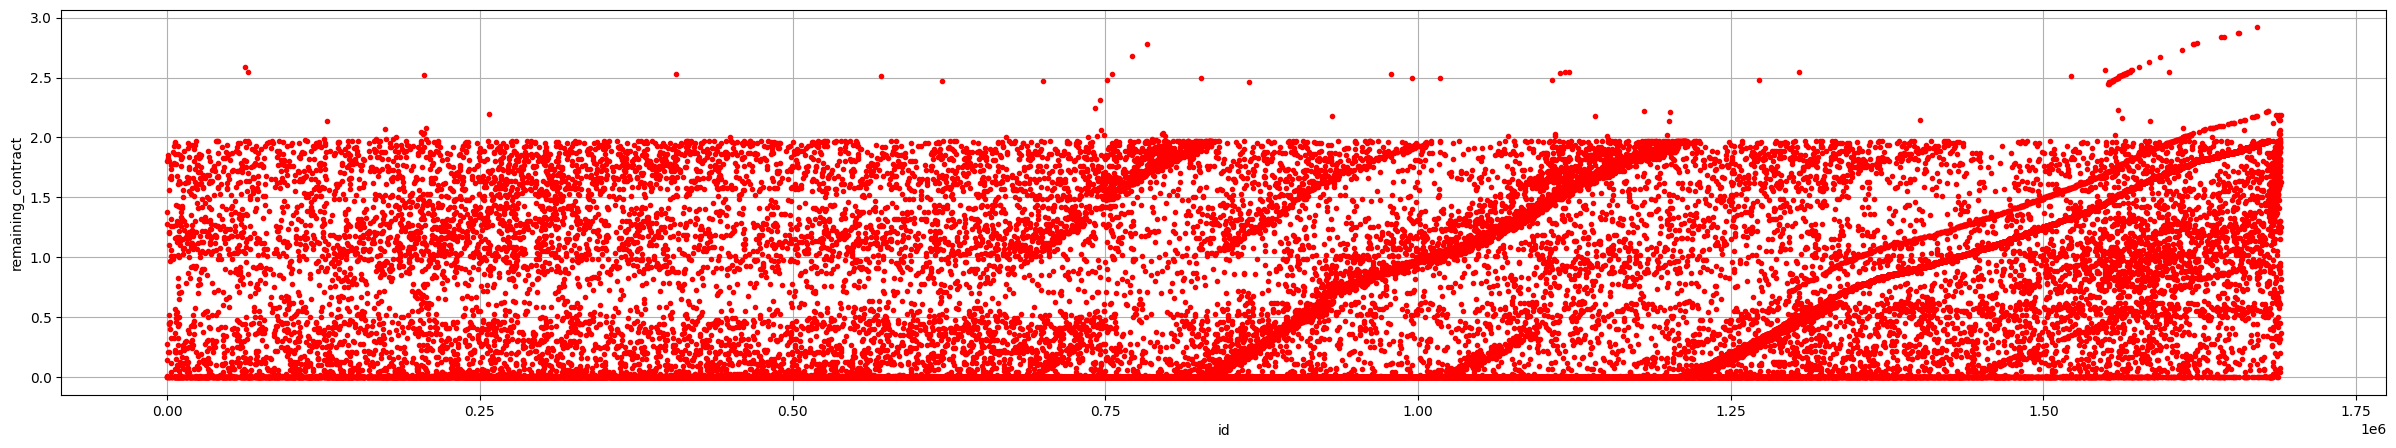

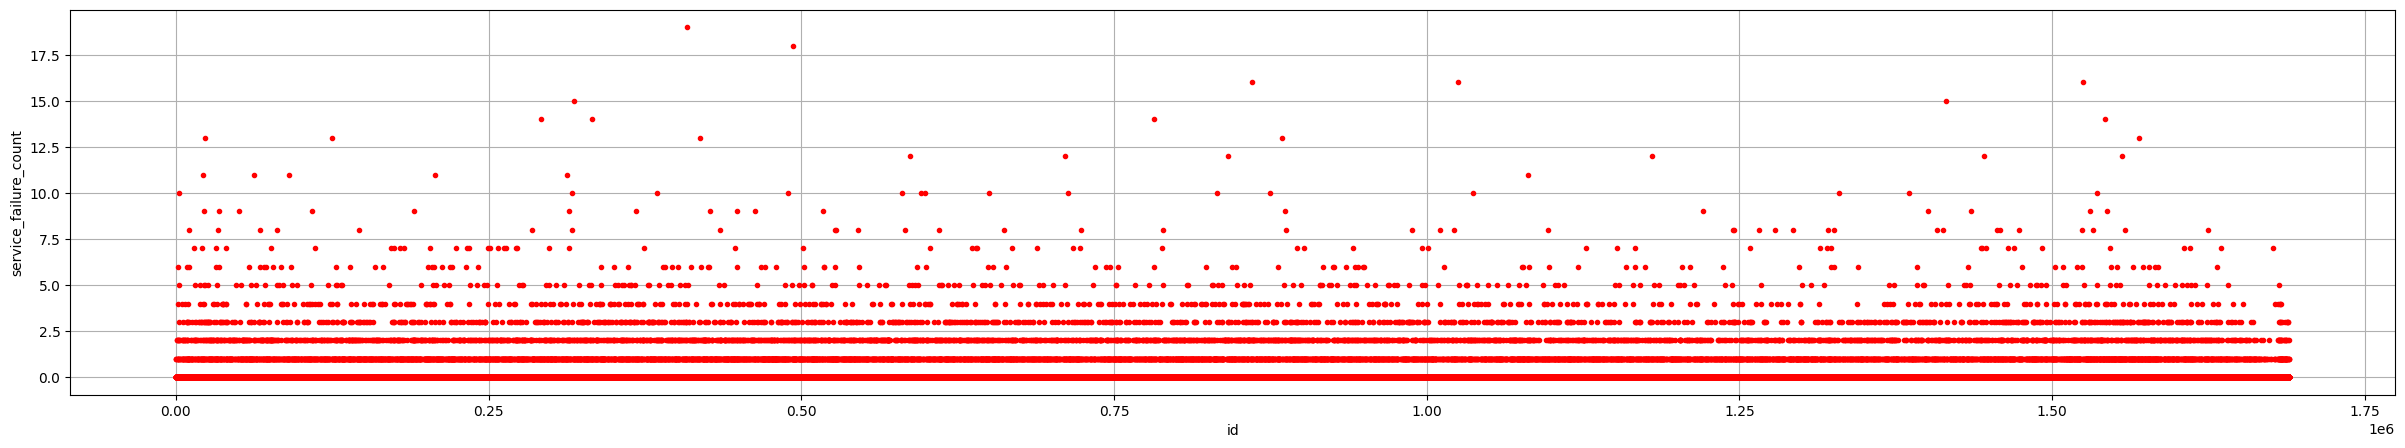

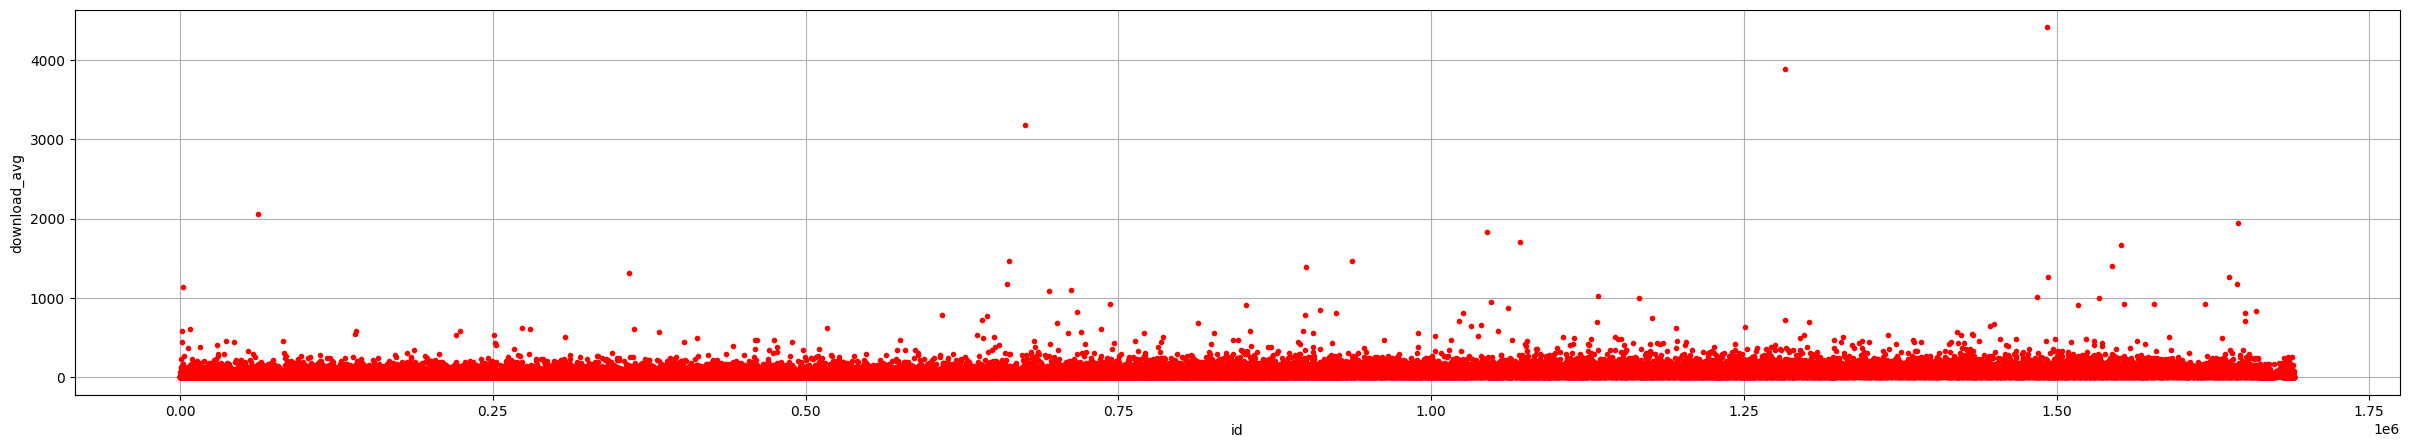

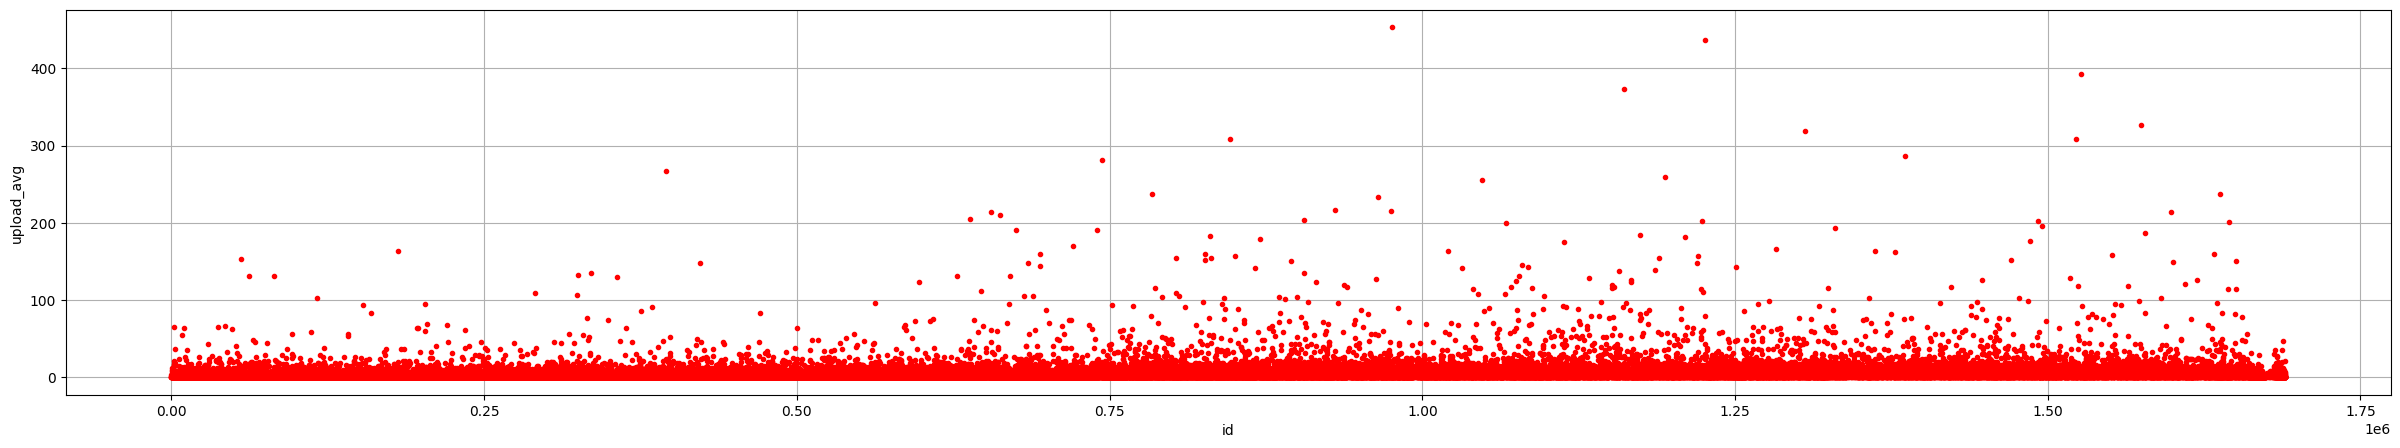

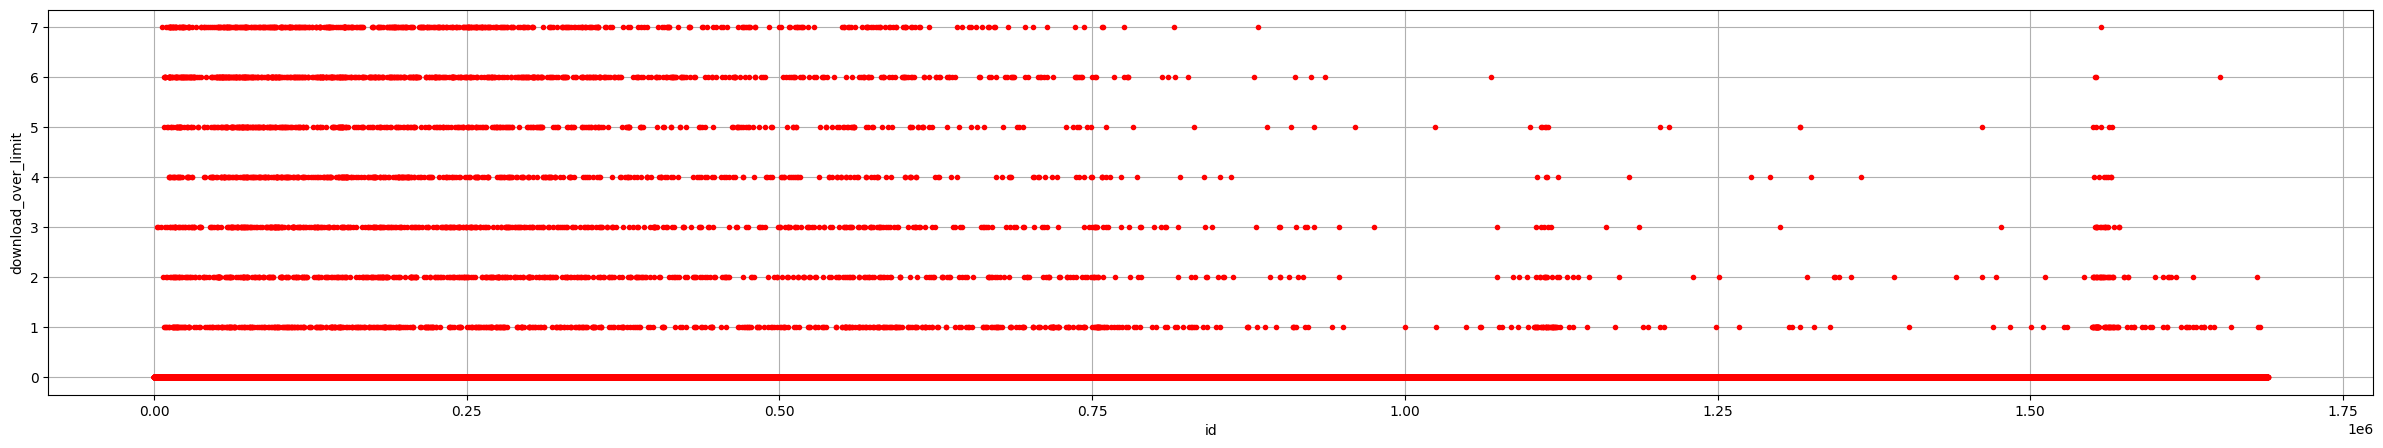

In [ ]:

for column in df.columns[1:-1]:
  plt.figure(figsize=(30, 5))
  simple_figure(df, "id", column, fsize=(20, 10))
  plt.show()


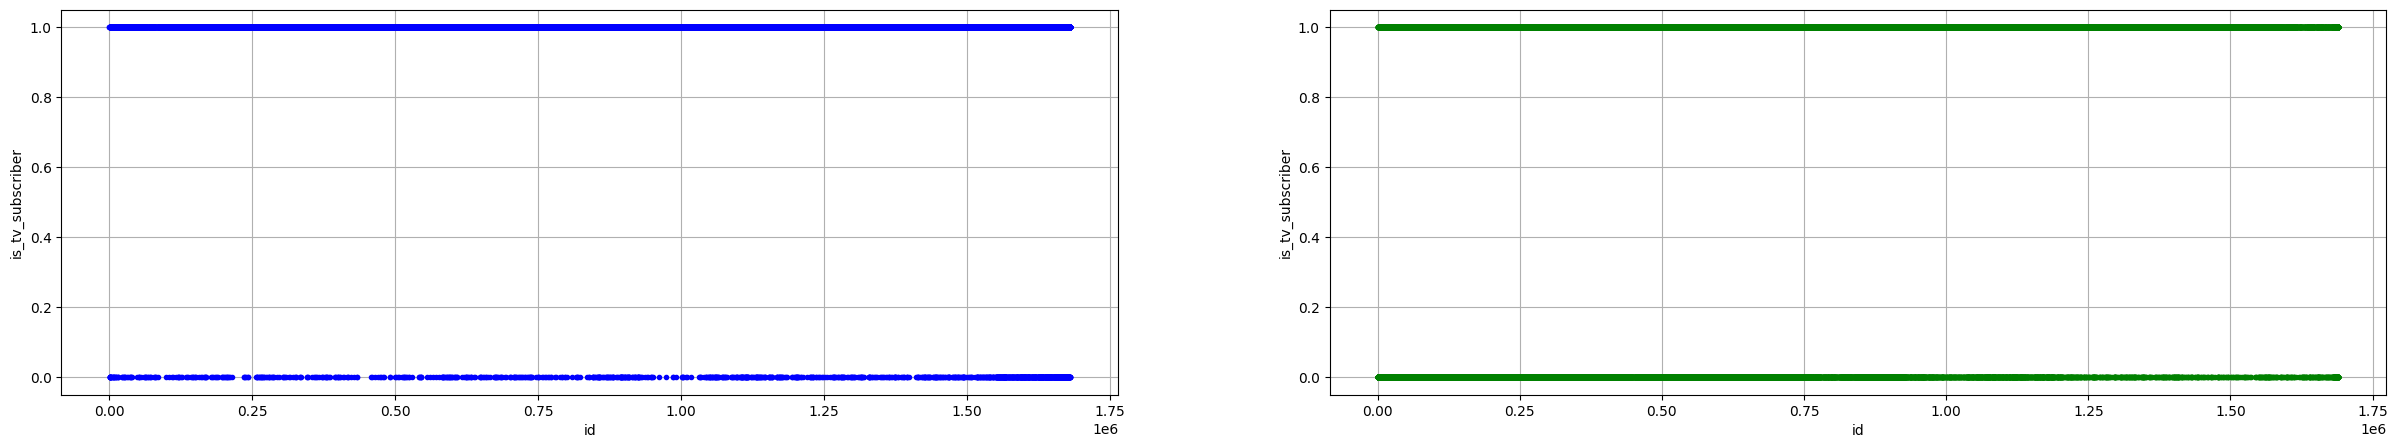

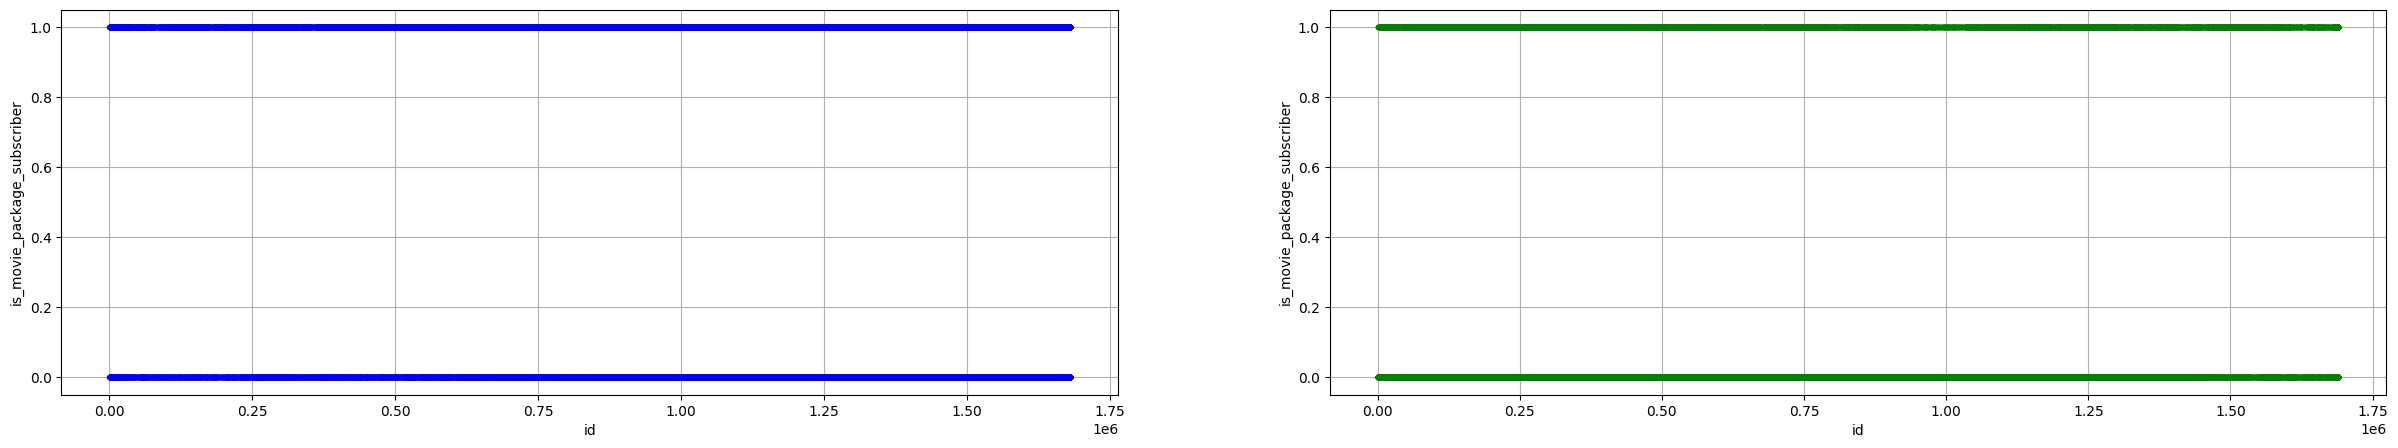

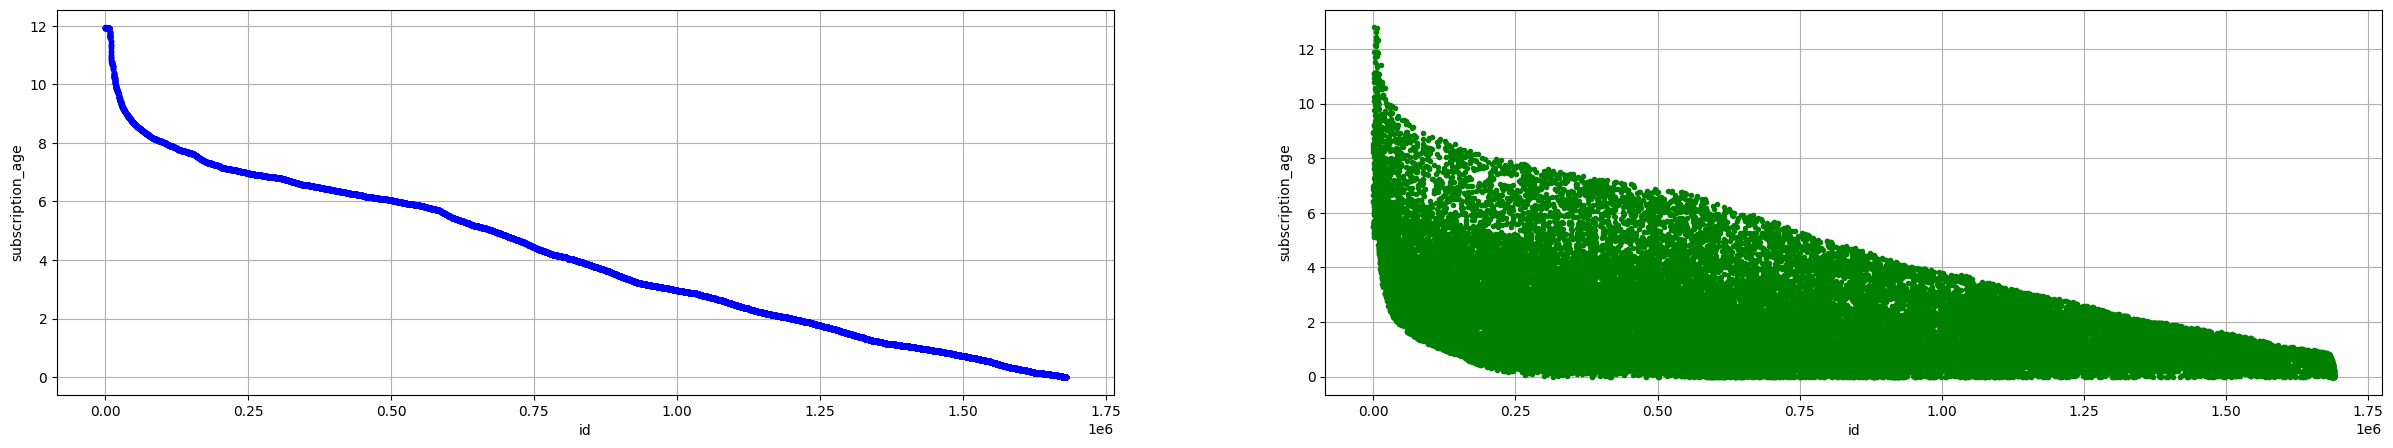

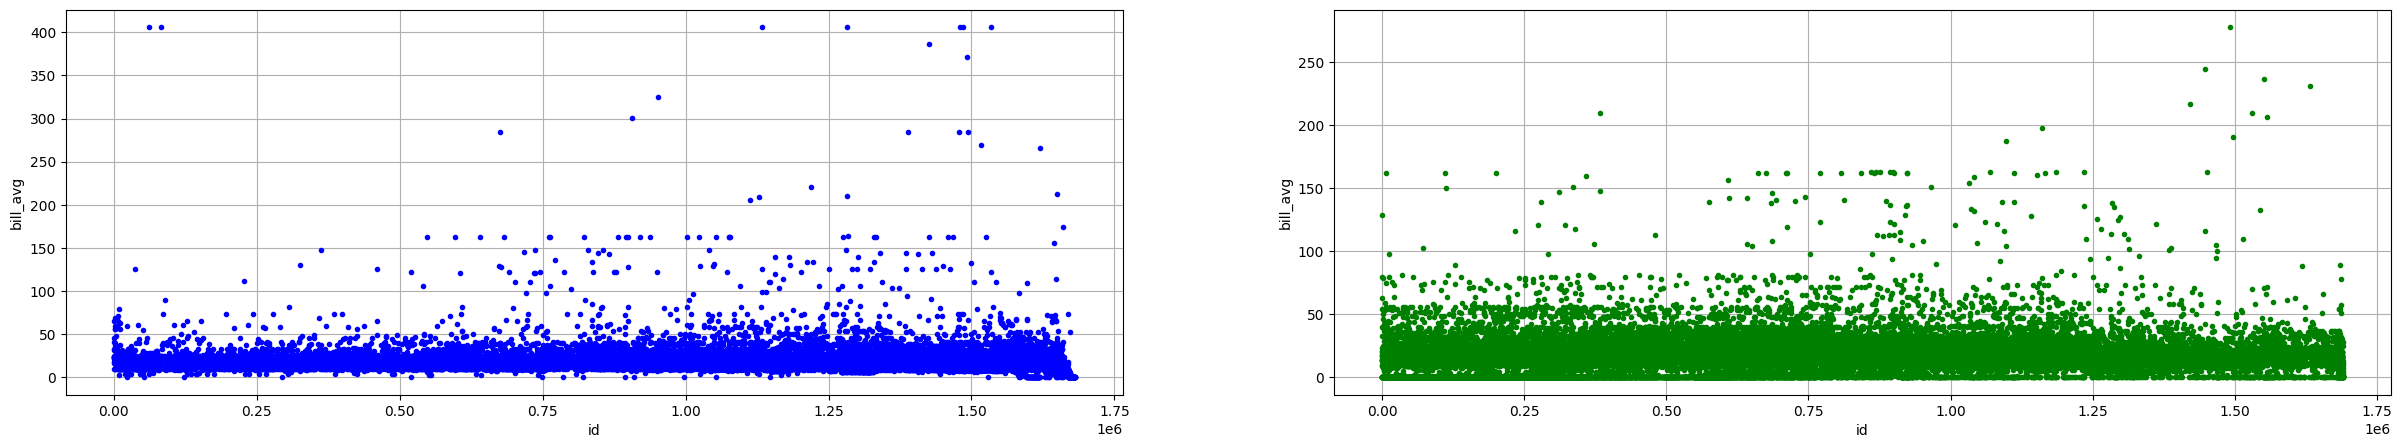

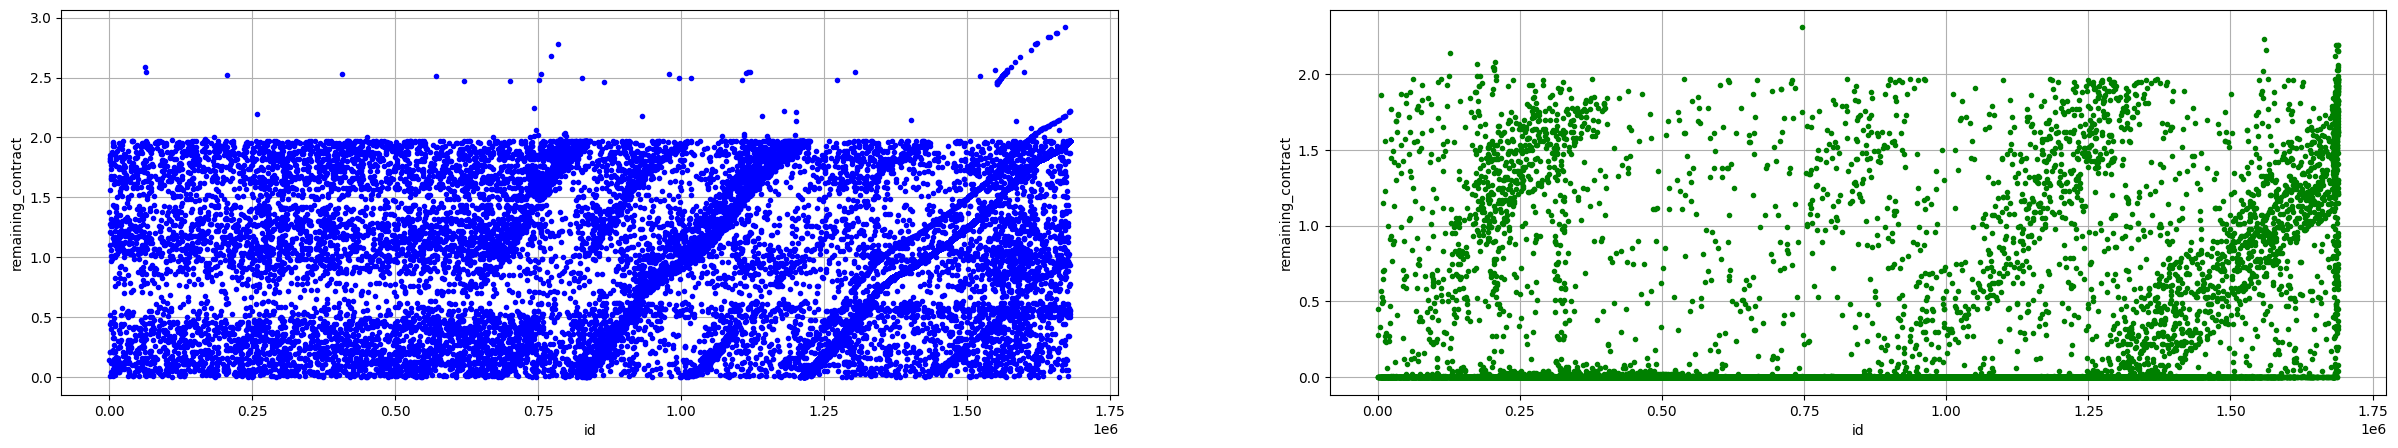

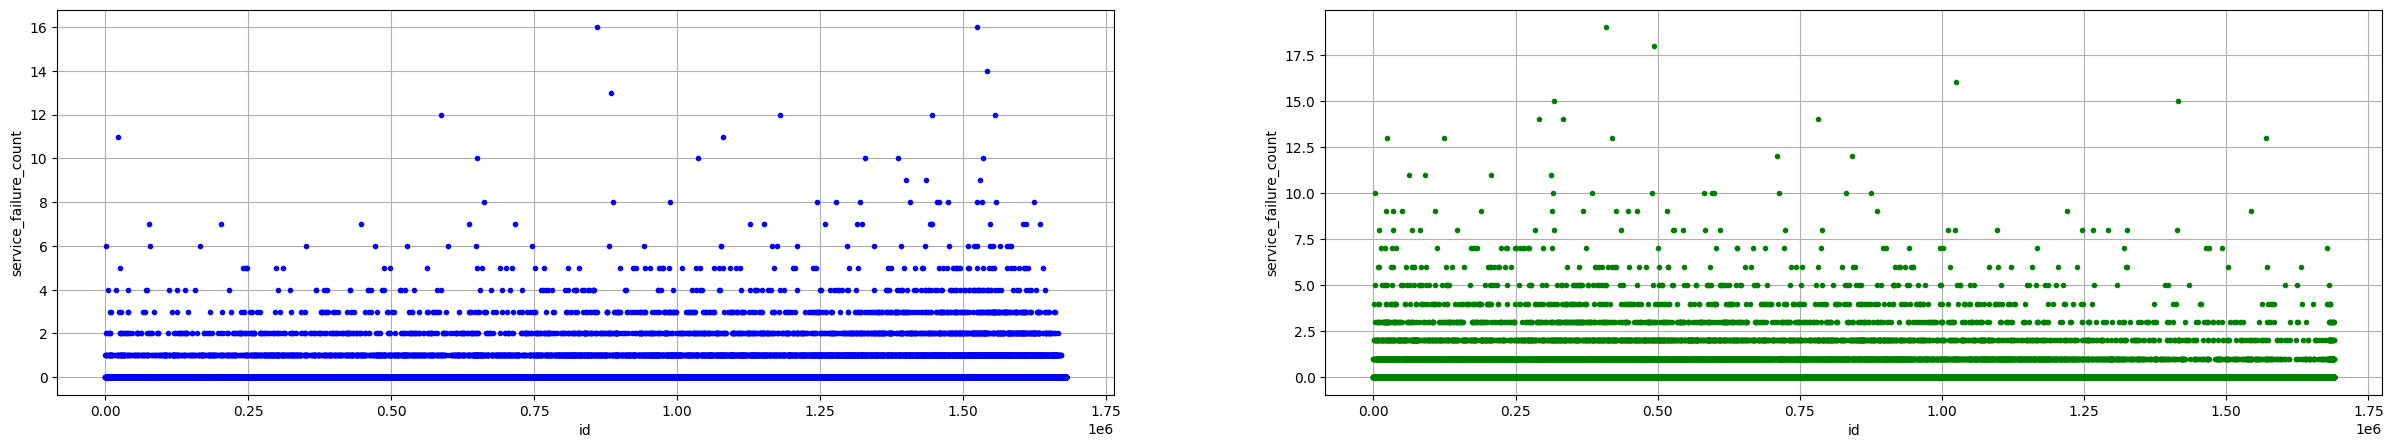

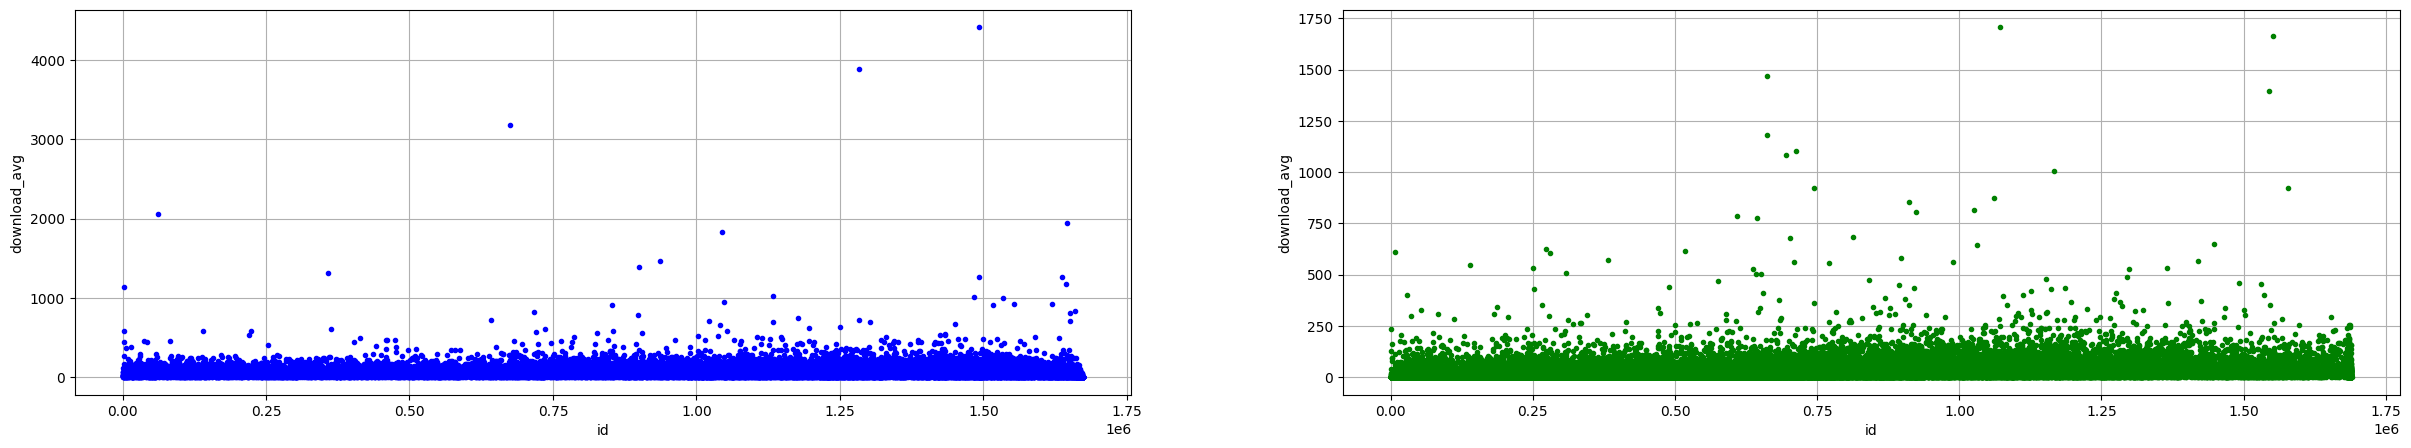

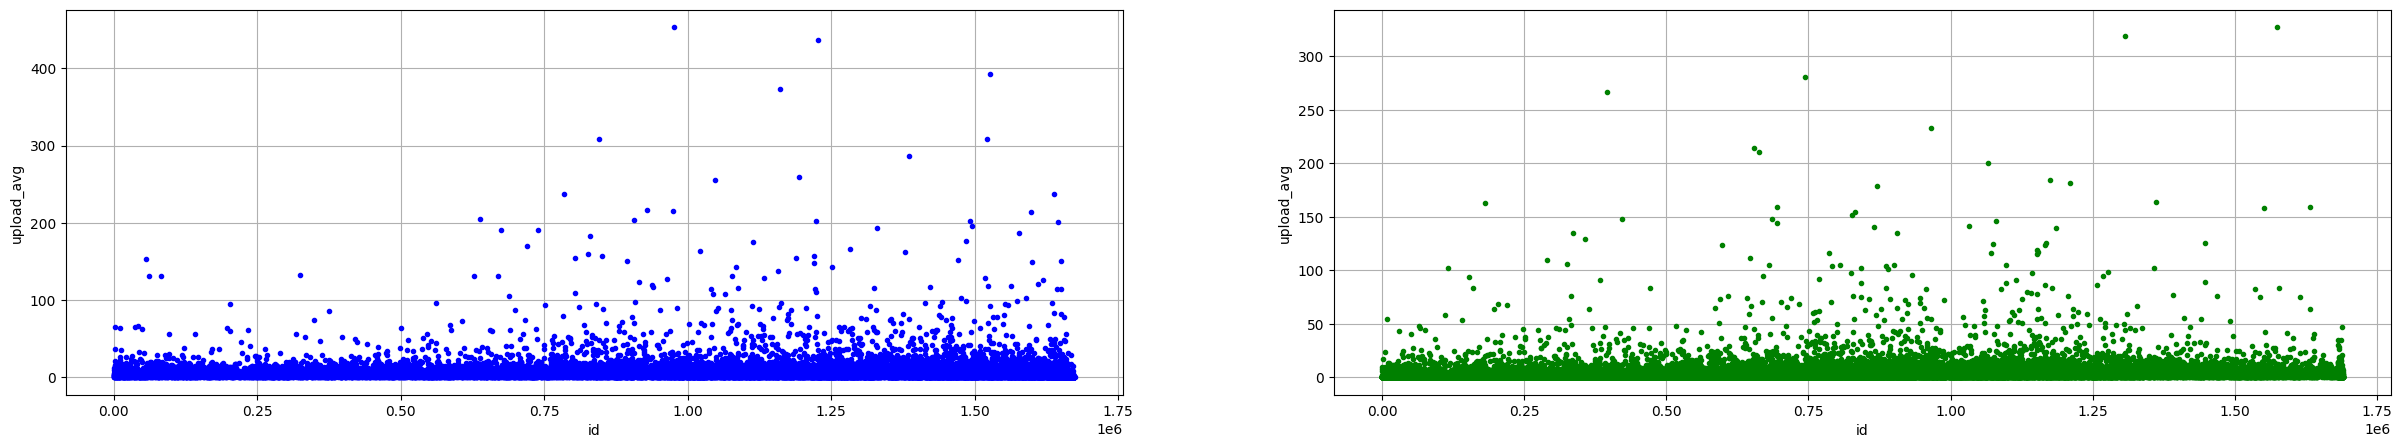

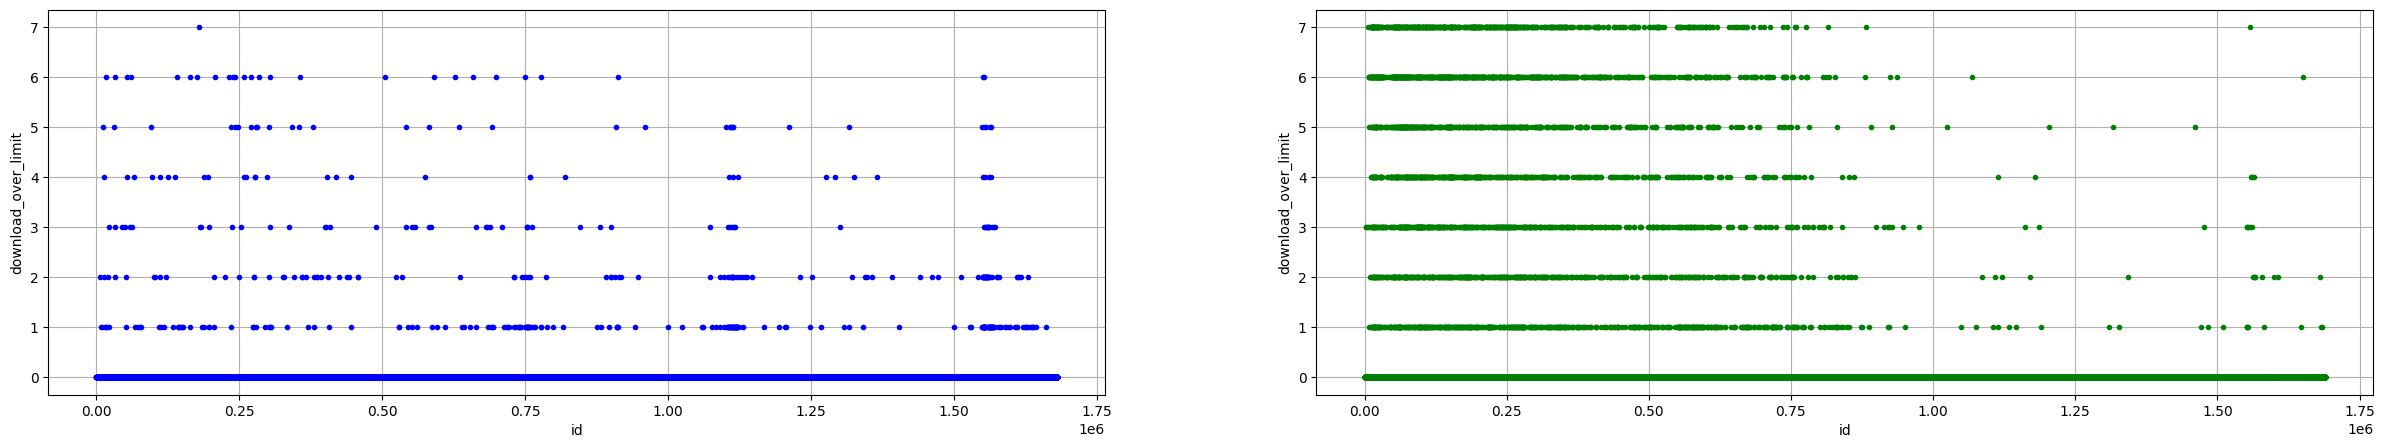

In [ ]:
for column in df.columns[1:-1]:
  plt.figure(figsize=(30, 5))
  plt.subplot(1,2,1)
  simple_figure(sub_dfs_ch[0], "id", column, fsize=(20, 10), marker = "b.")
  plt.subplot(1,2,2)
  simple_figure(sub_dfs_ch[1], "id", column, fsize=(20, 10), marker = "g.")
  plt.show()

Z wykresów wynika, że niezerowy "download_over_limit" występuje znacznie częściej wśród klientów o niższych "id" (starych), co więcej są to przeważnie "starzy klienci", którzy odeszli ("churn" = 1). Nasuwa się wniosek, że ten problem występował dawniej i został rozwiązany. Być może sensowne będzie do budowy modelu wykorzystanie tylko próbek "nowszych". Można zaobserwować też wysepowanie outlayerów

Dziwne zjawisko:


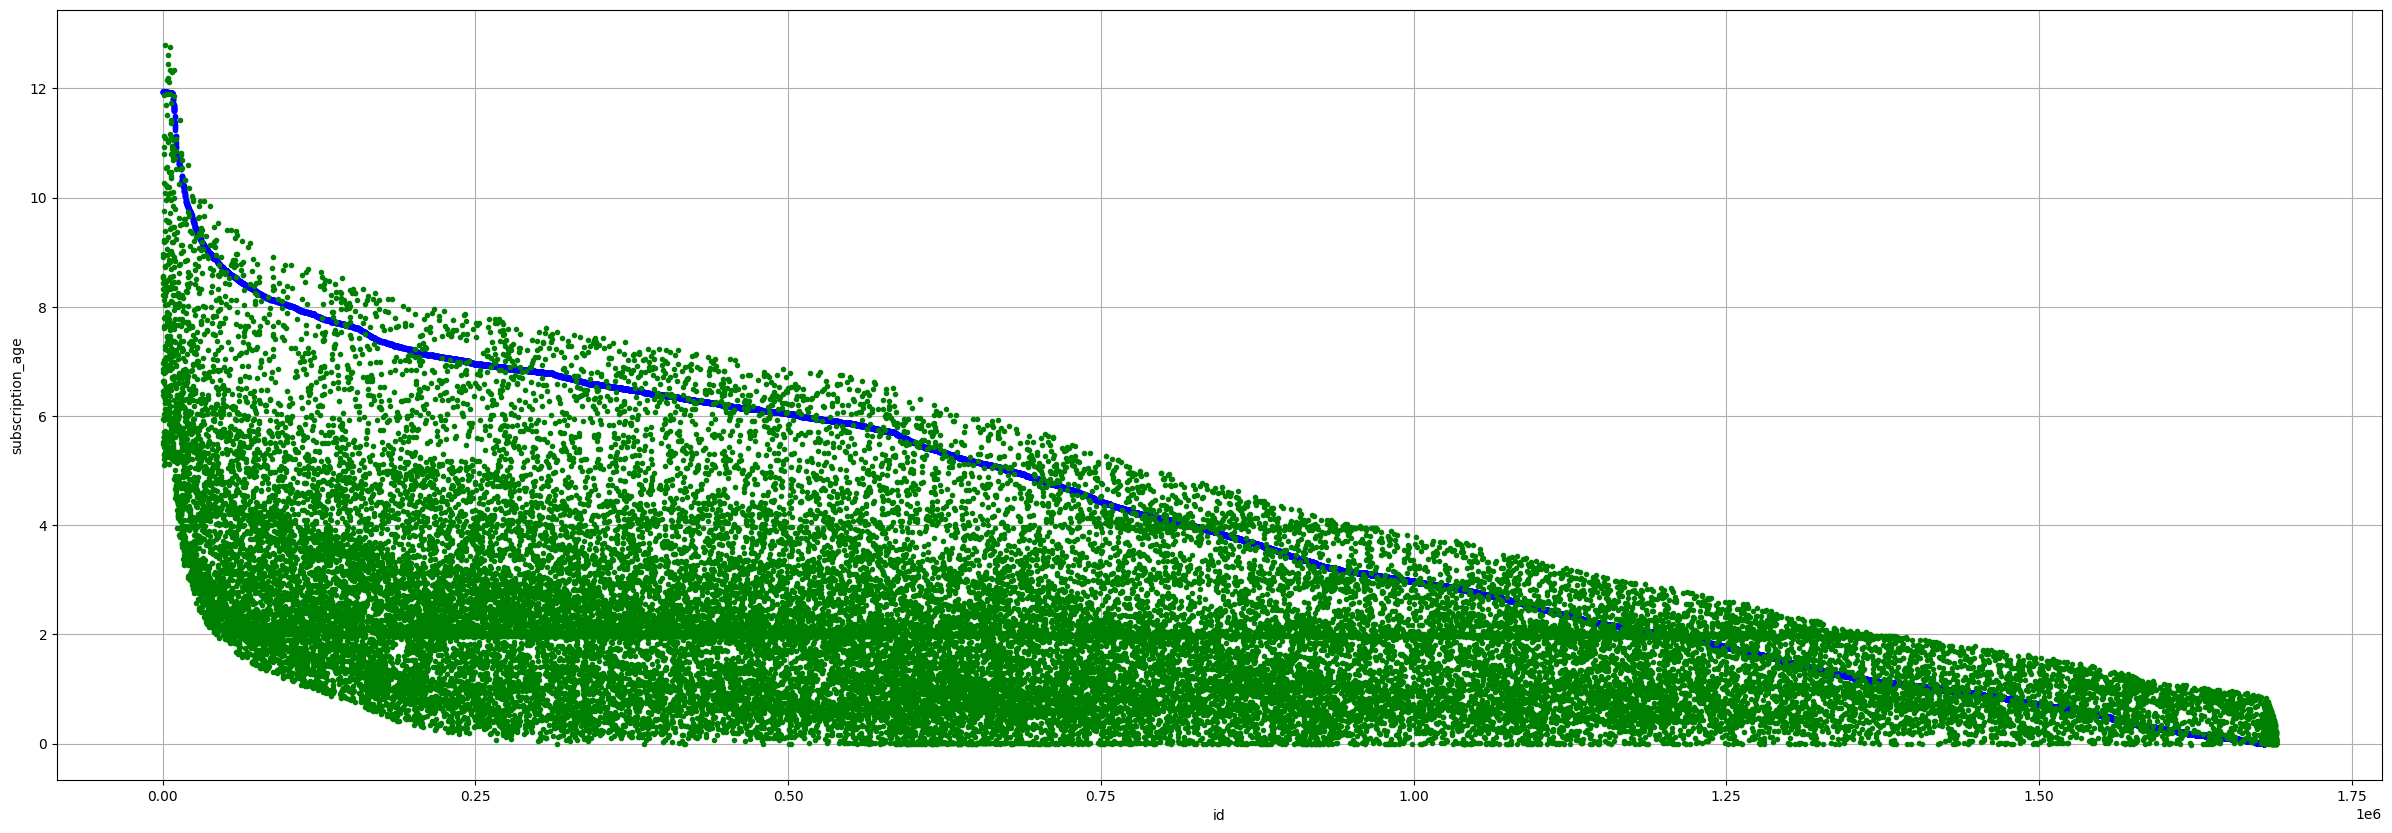

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(sub_dfs_ch[0]["id"], sub_dfs_ch[0]["subscription_age"], "b.", sub_dfs_ch[1]["id"], sub_dfs_ch[1]["subscription_age"], "g.")
plt.xlabel("id")
plt.ylabel("subscription_age")
plt.grid(True)
plt.show()

Niebieska linia będąca wykresem malejącej zalieżności pomiędzy id, a wiekiem subskrypcji dla aktywnych klientów, ewidentnie wskazuje na to, że numery id są nadawane klientom po kolei. Im wyższe id, tym mniejszy wiek subskrypcji.
Punkt zielony ponad niebieską linią to teoretycznie klient, którego wiek subskrypcji jest większy niż czas, jaki minął odkąd stał się klientem (nadano mu id). Jakim cudem? Może to błąd w datasecie? Może istnienie takich rekordów w bazie danych jest wynikiem ataku na bazę? :D

Identyfikacja outlayerów:


In [ ]:
# copy-paste out-01

ba = 'bill_avg'
da = "download_avg"
ua = "upload_avg"

ba_border = 100
da_border = 400
ua_border = 60

Analiza datasetu z podziałem próbek na "starsze" i "nowsze"

In [ ]:
id = "id"
id_border = df[id].median()
#id_border = 1e6
print(id_border)

847784.0


In [ ]:
bool_vecs_id = {
                f"id < {id_border}": df[id] < id_border,
                f"id >= {id_border}": df[id] >= id_border,
                }

In [ ]:
sub_dfs_id = fns.create_subdfs_list(df, bool_vecs_id)

(36137, 11)
(36137, 11)


In [ ]:
sub_dfs_id[0].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count   36137.000000      36137.000000                 36137.000000   
mean   422787.264549          0.713147                     0.281623   
std    245519.906936          0.452299                     0.449797   
min        15.000000          0.000000                     0.000000   
25%    209550.000000          0.000000                     0.000000   
50%    422216.000000          1.000000                     0.000000   
75%    635534.000000          1.000000                     1.000000   
max    847782.000000          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      36137.000000  36137.000000        18988.000000   
mean           3.445228     18.919722            0.484411   
std            2.296444     12.263600            0.679838   
min            0.000000      0.000000            0.000000   
25%            1.700000     14.000000            0.000000   
50%            2.880000     20.000000            0.000000   
75%            5.050000     23.000000            1.070000   
max           12.800000    406.000000            2.780000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           36137.000000  36078.000000  36078.000000         36137.000000   
mean                0.295846     28.825453      2.800319             0.397183   
std                 0.856193     52.263180      7.606892             1.364582   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      0.000000      0.000000             0.000000   
50%                 0.000000     11.200000      0.900000             0.000000   
75%                 0.000000     38.600000      3.100000             0.000000   
max                19.000000   3179.800000    308.600000             7.000000   

              churn  
count  36137.000000  
mean       0.760578  
std        0.426737  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
sub_dfs_id[1].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  3.613700e+04      36137.000000                 36137.000000   
mean   1.269849e+06          0.917370                     0.387636   
std    2.437243e+05          0.275326                     0.487217   
min    8.477860e+05          0.000000                     0.000000   
25%    1.058439e+06          1.000000                     0.000000   
50%    1.269565e+06          1.000000                     0.000000   
75%    1.482914e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      36137.000000  36137.000000        31714.000000   
mean           1.454875     18.965243            0.854721   
std            1.013914     14.103219            0.669957   
min           -0.020000      0.000000            0.000000   
25%            0.640000     13.000000            0.120000   
50%            1.210000     17.000000            0.890000   
75%            2.130000     22.000000            1.410000   
max            4.620000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           36137.000000  35815.000000  35815.000000         36137.000000   
mean                0.252622     58.663524      5.594053             0.018042   
std                 0.774440     69.799522     11.459736             0.233620   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000     22.300000      1.600000             0.000000   
50%                 0.000000     43.300000      3.300000             0.000000   
75%                 0.000000     76.300000      6.200000             0.000000   
max                16.000000   4415.200000    453.300000             7.000000   

              churn  
count  36137.000000  
mean       0.347705  
std        0.476248  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

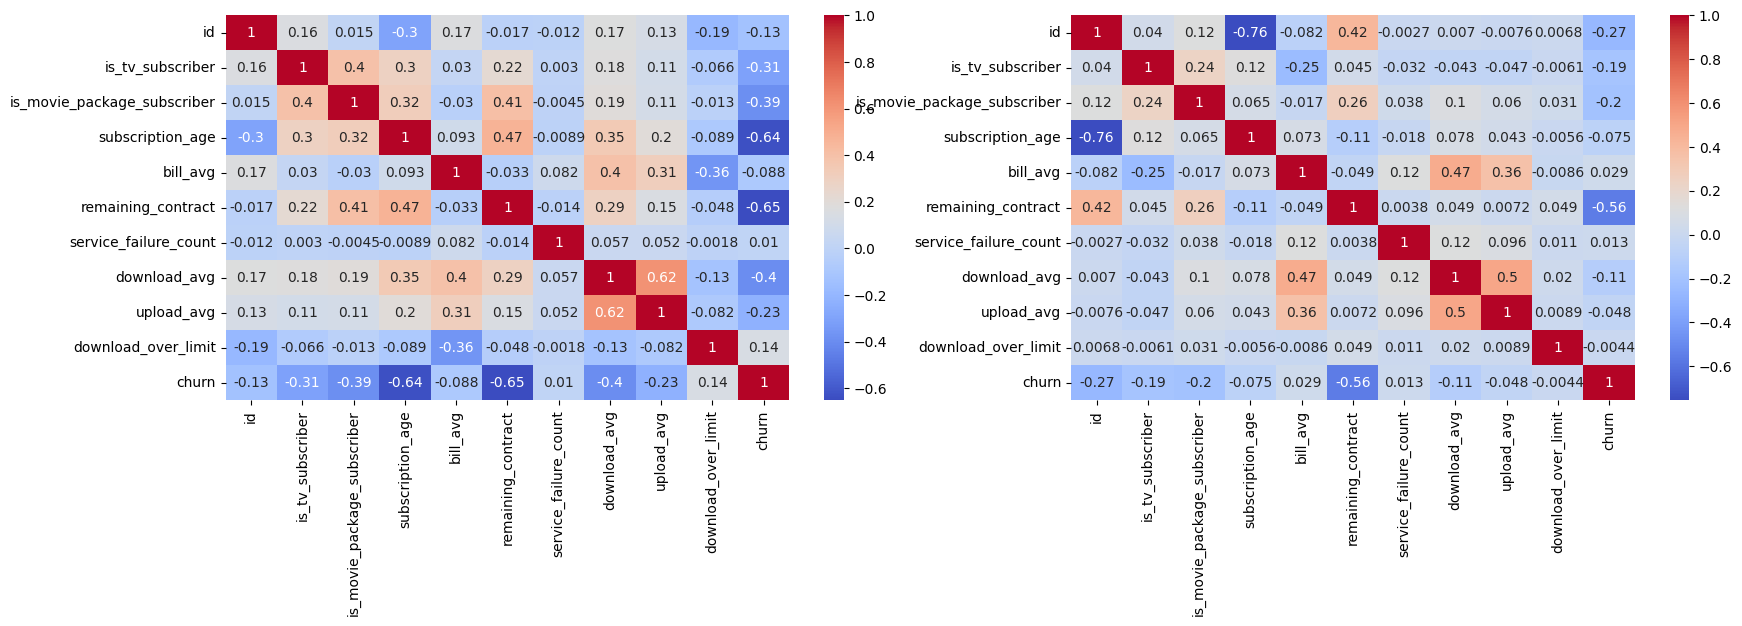

In [ ]:
fns.corr_comparison(sub_dfs_id[0], sub_dfs_id[1])

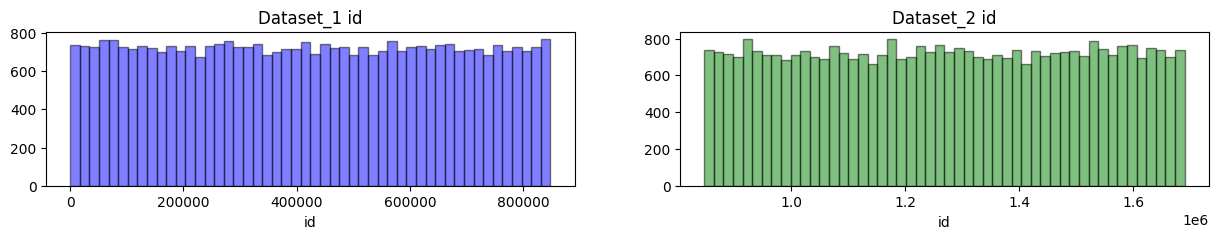

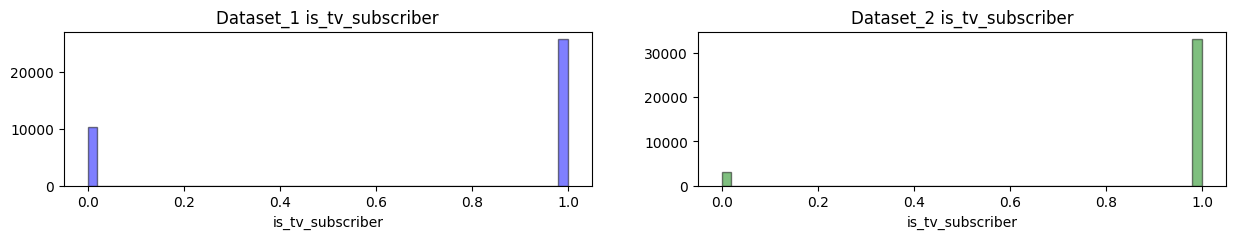

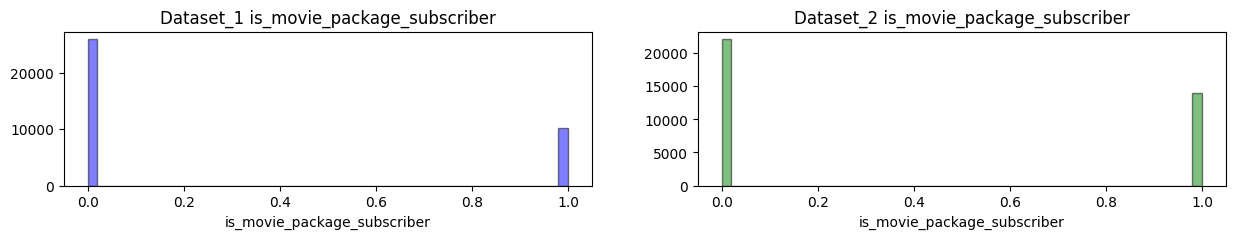

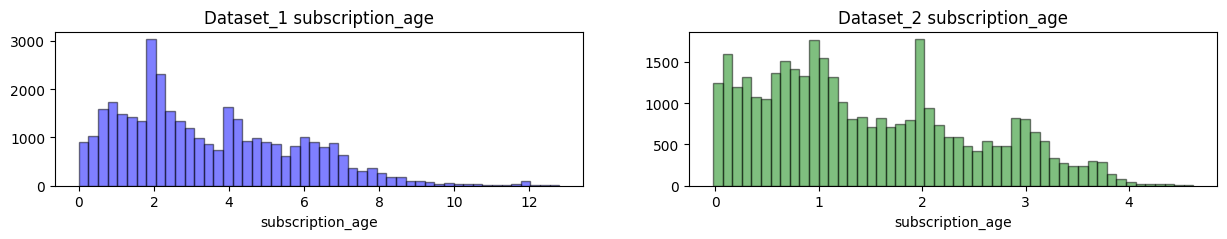

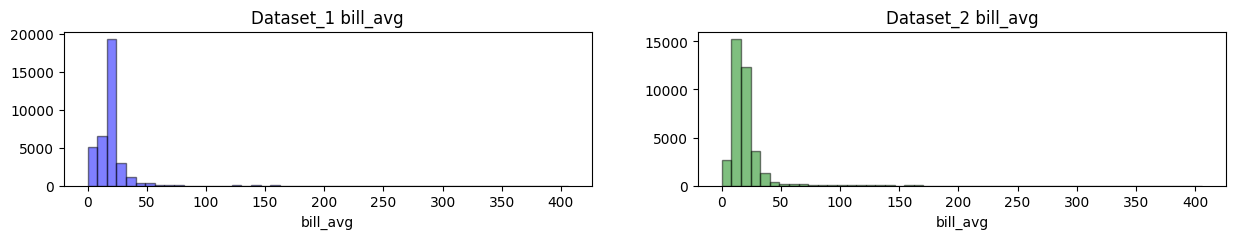

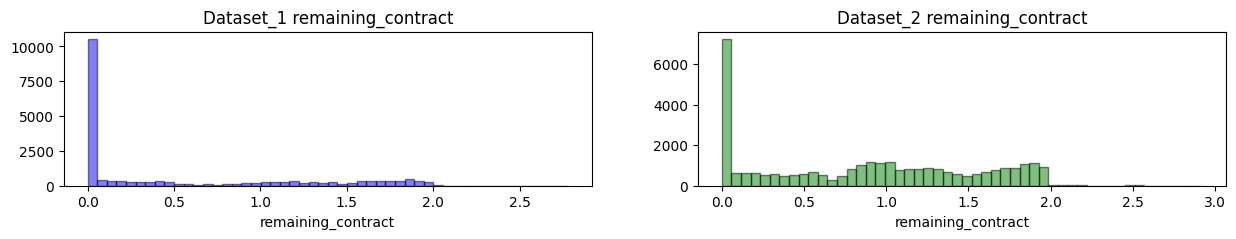

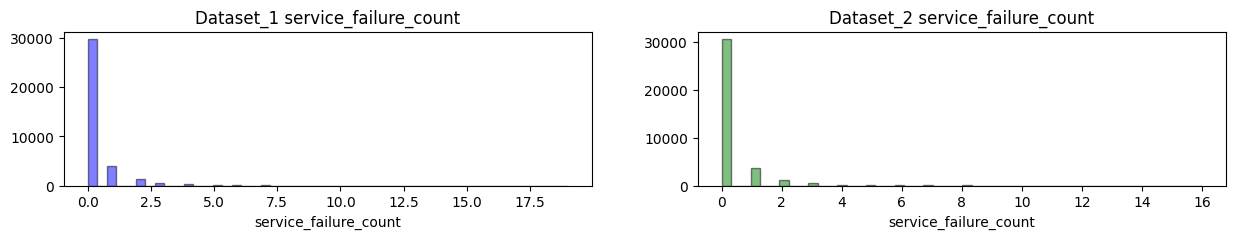

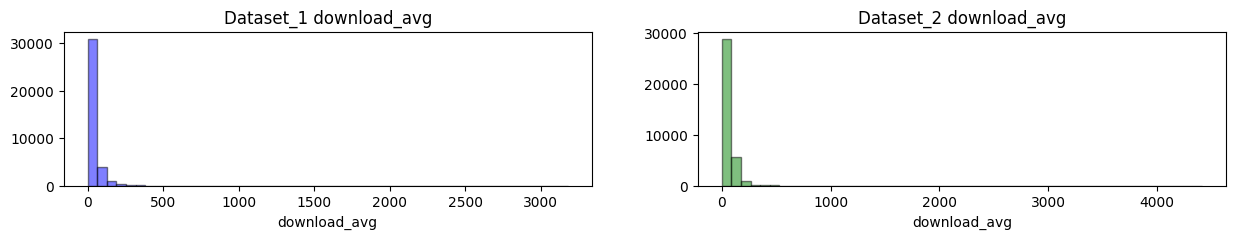

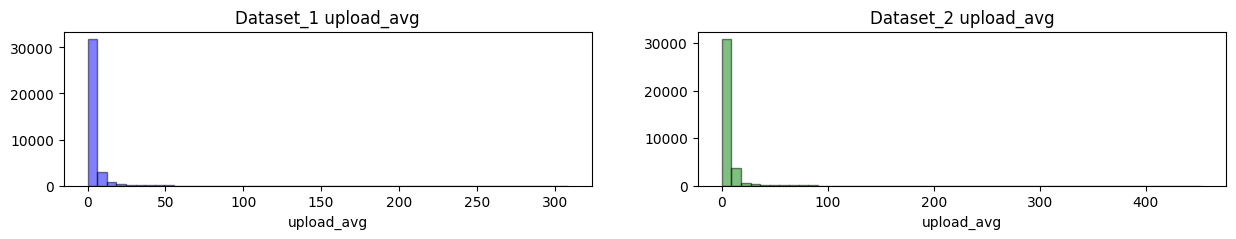

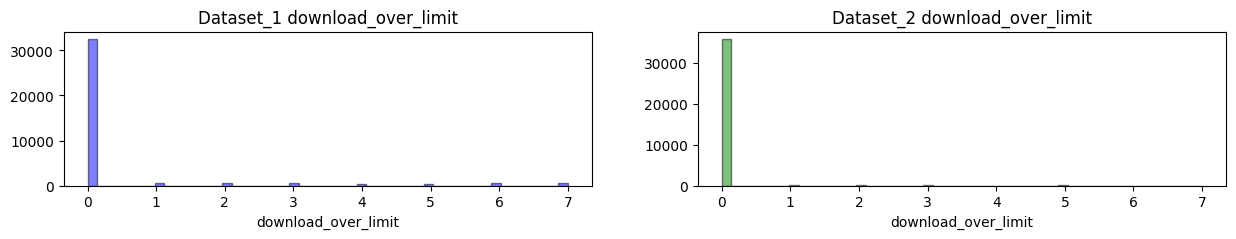

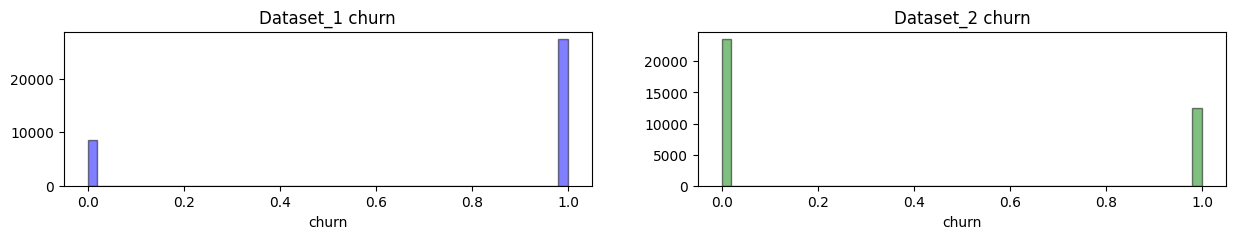

In [ ]:
fns.hist_comparison(sub_dfs_id[0], sub_dfs_id[1])

Wyodrębnienie outlayerów

In [ ]:
# copy-paste out-02

bool_vecs_ba = {
                f"bill_avg < {ba_border}": df.fillna(ba_border)[ba] < ba_border,
                f"bill_avg >= {ba_border}": df.fillna(ba_border)[ba] >= ba_border,
                }


bool_vecs_da = {
                f"download_avg < {da_border}": df.fillna(da_border)[da] < da_border,
                f"download_avg >= {da_border}": df.fillna(da_border)[da] >= da_border,
                }



bool_vecs_ua = {
                f"upload_avg < {ua_border}": df.fillna(ua_border)[ua] < ua_border,
                f"upload_avg >= {ua_border}": df.fillna(ua_border)[ua] >= ua_border,
                }

In [ ]:
# copy-paste out-03

sub_dfs_ba = fns.create_subdfs_list(df, bool_vecs_ba)
sub_dfs_da = fns.create_subdfs_list(df, bool_vecs_da)
sub_dfs_ua = fns.create_subdfs_list(df, bool_vecs_ua)

(72030, 11)
(244, 11)
(71718, 11)
(556, 11)
(71581, 11)
(693, 11)


In [ ]:
sub_dfs_ba[0].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.203000e+04      72030.000000                 72030.000000   
mean   8.457796e+05          0.816701                     0.334944   
std    4.893413e+05          0.386914                     0.471974   
min    1.500000e+01          0.000000                     0.000000   
25%    4.214695e+05          1.000000                     0.000000   
50%    8.467950e+05          1.000000                     0.000000   
75%    1.269430e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      72030.000000  72030.000000        50610.000000   
mean           2.450149     18.481660            0.716403   
std            2.035331      9.971231            0.697226   
min           -0.020000      0.000000            0.000000   
25%            0.930000     13.000000            0.000000   
50%            1.980000     19.000000            0.570000   
75%            3.300000     22.000000            1.310000   
max           12.800000     99.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           72030.000000  71650.000000  71650.000000         72030.000000   
mean                0.271859     42.572113      4.049090             0.208316   
std                 0.810722     52.851777      9.035498             0.998737   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      6.700000      0.500000             0.000000   
50%                 0.000000     27.700000      2.100000             0.000000   
75%                 0.000000     60.100000      4.800000             0.000000   
max                19.000000   1947.900000    453.300000             7.000000   

              churn  
count  72030.000000  
mean       0.554422  
std        0.497033  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
sub_dfs_da[0].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.171800e+04      71718.000000                 71718.000000   
mean   8.429104e+05          0.815709                     0.334031   
std    4.872089e+05          0.387724                     0.471654   
min    1.500000e+01          0.000000                     0.000000   
25%    4.206422e+05          1.000000                     0.000000   
50%    8.442445e+05          1.000000                     0.000000   
75%    1.264472e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      71718.000000  71718.000000        50275.000000   
mean           2.454821     18.805642            0.709966   
std            2.025776     11.694866            0.693901   
min           -0.020000      0.000000            0.000000   
25%            0.940000     13.000000            0.000000   
50%            1.980000     19.000000            0.560000   
75%            3.300000     22.000000            1.300000   
max           12.800000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           71718.000000  71718.000000  71718.000000         71718.000000   
mean                0.273585     42.095326      4.035429             0.209139   
std                 0.812917     48.132567      8.833961             1.000649   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      6.700000      0.500000             0.000000   
50%                 0.000000     27.700000      2.100000             0.000000   
75%                 0.000000     60.100000      4.800000             0.000000   
max                19.000000    399.600000    453.300000             7.000000   

              churn  
count  71718.000000  
mean       0.557670  
std        0.496666  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
sub_dfs_ua[0].describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.158100e+04      71581.000000                 71581.000000   
mean   8.424766e+05          0.815510                     0.333664   
std    4.873711e+05          0.387886                     0.471525   
min    1.500000e+01          0.000000                     0.000000   
25%    4.198900e+05          1.000000                     0.000000   
50%    8.435590e+05          1.000000                     0.000000   
75%    1.264504e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      71581.000000  71581.000000        50156.000000   
mean           2.455777     18.810774            0.710251   
std            2.027023     11.732010            0.693934   
min           -0.020000      0.000000            0.000000   
25%            0.940000     13.000000            0.000000   
50%            1.980000     19.000000            0.560000   
75%            3.300000     22.000000            1.300000   
max           12.800000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           71581.000000  71581.000000  71581.000000         71581.000000   
mean                0.273355     42.512537      3.724723             0.209385   
std                 0.811986     51.955028      5.453263             1.001311   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      6.600000      0.500000             0.000000   
50%                 0.000000     27.600000      2.100000             0.000000   
75%                 0.000000     59.900000      4.800000             0.000000   
max                19.000000   1396.400000     59.900000             7.000000   

              churn  
count  71581.000000  
mean       0.557774  
std        0.496654  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
sub_dfs_ba[1]["id"]

35           790
281         6330
1594       36952
2705       61830
3133       71788
          ...   
69811    1632840
70332    1644358
70511    1648405
70591    1650364
70966    1659270
Name: id, Length: 244, dtype: int64

In [ ]:
sub_dfs_da[1]["id"]

25           617
52          1151
54          1169
63          1413
83          1783
          ...   
71835    1680161
71836    1680174
71837    1680212
71838    1680257
71839    1680282
Name: id, Length: 556, dtype: int64

In [ ]:
sub_dfs_ua[1]["id"]

25           617
52          1151
54          1169
63          1413
85          1805
          ...   
71835    1680161
71836    1680174
71837    1680212
71838    1680257
71839    1680282
Name: id, Length: 693, dtype: int64

In [ ]:
# copy-paste out-04

idx_to_drop = sub_dfs_ba[1]["id"].index
idx_to_drop = idx_to_drop.append(sub_dfs_da[1]["id"].index)
idx_to_drop = idx_to_drop.append(sub_dfs_ua[1]["id"].index)
idx_to_drop = idx_to_drop.drop_duplicates()
print(idx_to_drop)

Index([   35,   281,  1594,  2705,  3133,  3603,  4866,  4900,  8627,  9768,
       ...
       68340, 68396, 68832, 69035, 69589, 69735, 69914, 70089, 70570, 70805],
      dtype='int64', length=944)


In [ ]:
idx_to_drop.shape

(944,)

In [ ]:
df_no_out = df.drop(idx_to_drop)
df_no_out.shape

(71330, 11)

In [ ]:
df.shape

(72274, 11)

Porównanie statystyk. Czy poprawiły się kolumny oczyszcznone i czy nie zaburzyły inne.

In [ ]:
df.describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.227400e+04      72274.000000                 72274.000000   
mean   8.463182e+05          0.815259                     0.334629   
std    4.891022e+05          0.388090                     0.471864   
min    1.500000e+01          0.000000                     0.000000   
25%    4.222165e+05          1.000000                     0.000000   
50%    8.477840e+05          1.000000                     0.000000   
75%    1.269562e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      72274.000000  72274.000000        50702.000000   
mean           2.450051     18.942483            0.716039   
std            2.034990     13.215386            0.697102   
min           -0.020000      0.000000            0.000000   
25%            0.930000     13.000000            0.000000   
50%            1.980000     19.000000            0.570000   
75%            3.300000     22.000000            1.310000   
max           12.800000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           72274.000000  71893.000000  71893.000000         72274.000000   
mean                0.274234     43.689911      4.192076             0.207613   
std                 0.816621     63.405963      9.818896             0.997123   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      6.700000      0.500000             0.000000   
50%                 0.000000     27.800000      2.100000             0.000000   
75%                 0.000000     60.500000      4.800000             0.000000   
max                19.000000   4415.200000    453.300000             7.000000   

              churn  
count  72274.000000  
mean       0.554141  
std        0.497064  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
df_no_out.describe()

id  is_tv_subscriber  is_movie_package_subscriber  \
count  7.133000e+04      71330.000000                 71330.000000   
mean   8.420375e+05          0.816557                     0.333717   
std    4.875615e+05          0.387032                     0.471543   
min    1.500000e+01          0.000000                     0.000000   
25%    4.188130e+05          1.000000                     0.000000   
50%    8.428340e+05          1.000000                     0.000000   
75%    1.264220e+06          1.000000                     1.000000   
max    1.689744e+06          1.000000                     1.000000   

       subscription_age      bill_avg  remaining_contract  \
count      71330.000000  71330.000000        50033.000000   
mean           2.455038     18.480499            0.710129   
std            2.026544      9.793337            0.693940   
min           -0.020000      0.000000            0.000000   
25%            0.940000     13.000000            0.000000   
50%            1.980000     19.000000            0.560000   
75%            3.300000     22.000000            1.300000   
max           12.800000     99.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  \
count           71330.000000  71330.000000  71330.000000         71330.000000   
mean                0.271709     41.530076      3.652341             0.210108   
std                 0.808268     47.129970      5.237677             1.002989   
min                 0.000000      0.000000      0.000000             0.000000   
25%                 0.000000      6.600000      0.500000             0.000000   
50%                 0.000000     27.500000      2.100000             0.000000   
75%                 0.000000     59.600000      4.800000             0.000000   
max                19.000000    399.600000     59.900000             7.000000   

              churn  
count  71330.000000  
mean       0.558208  
std        0.496604  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

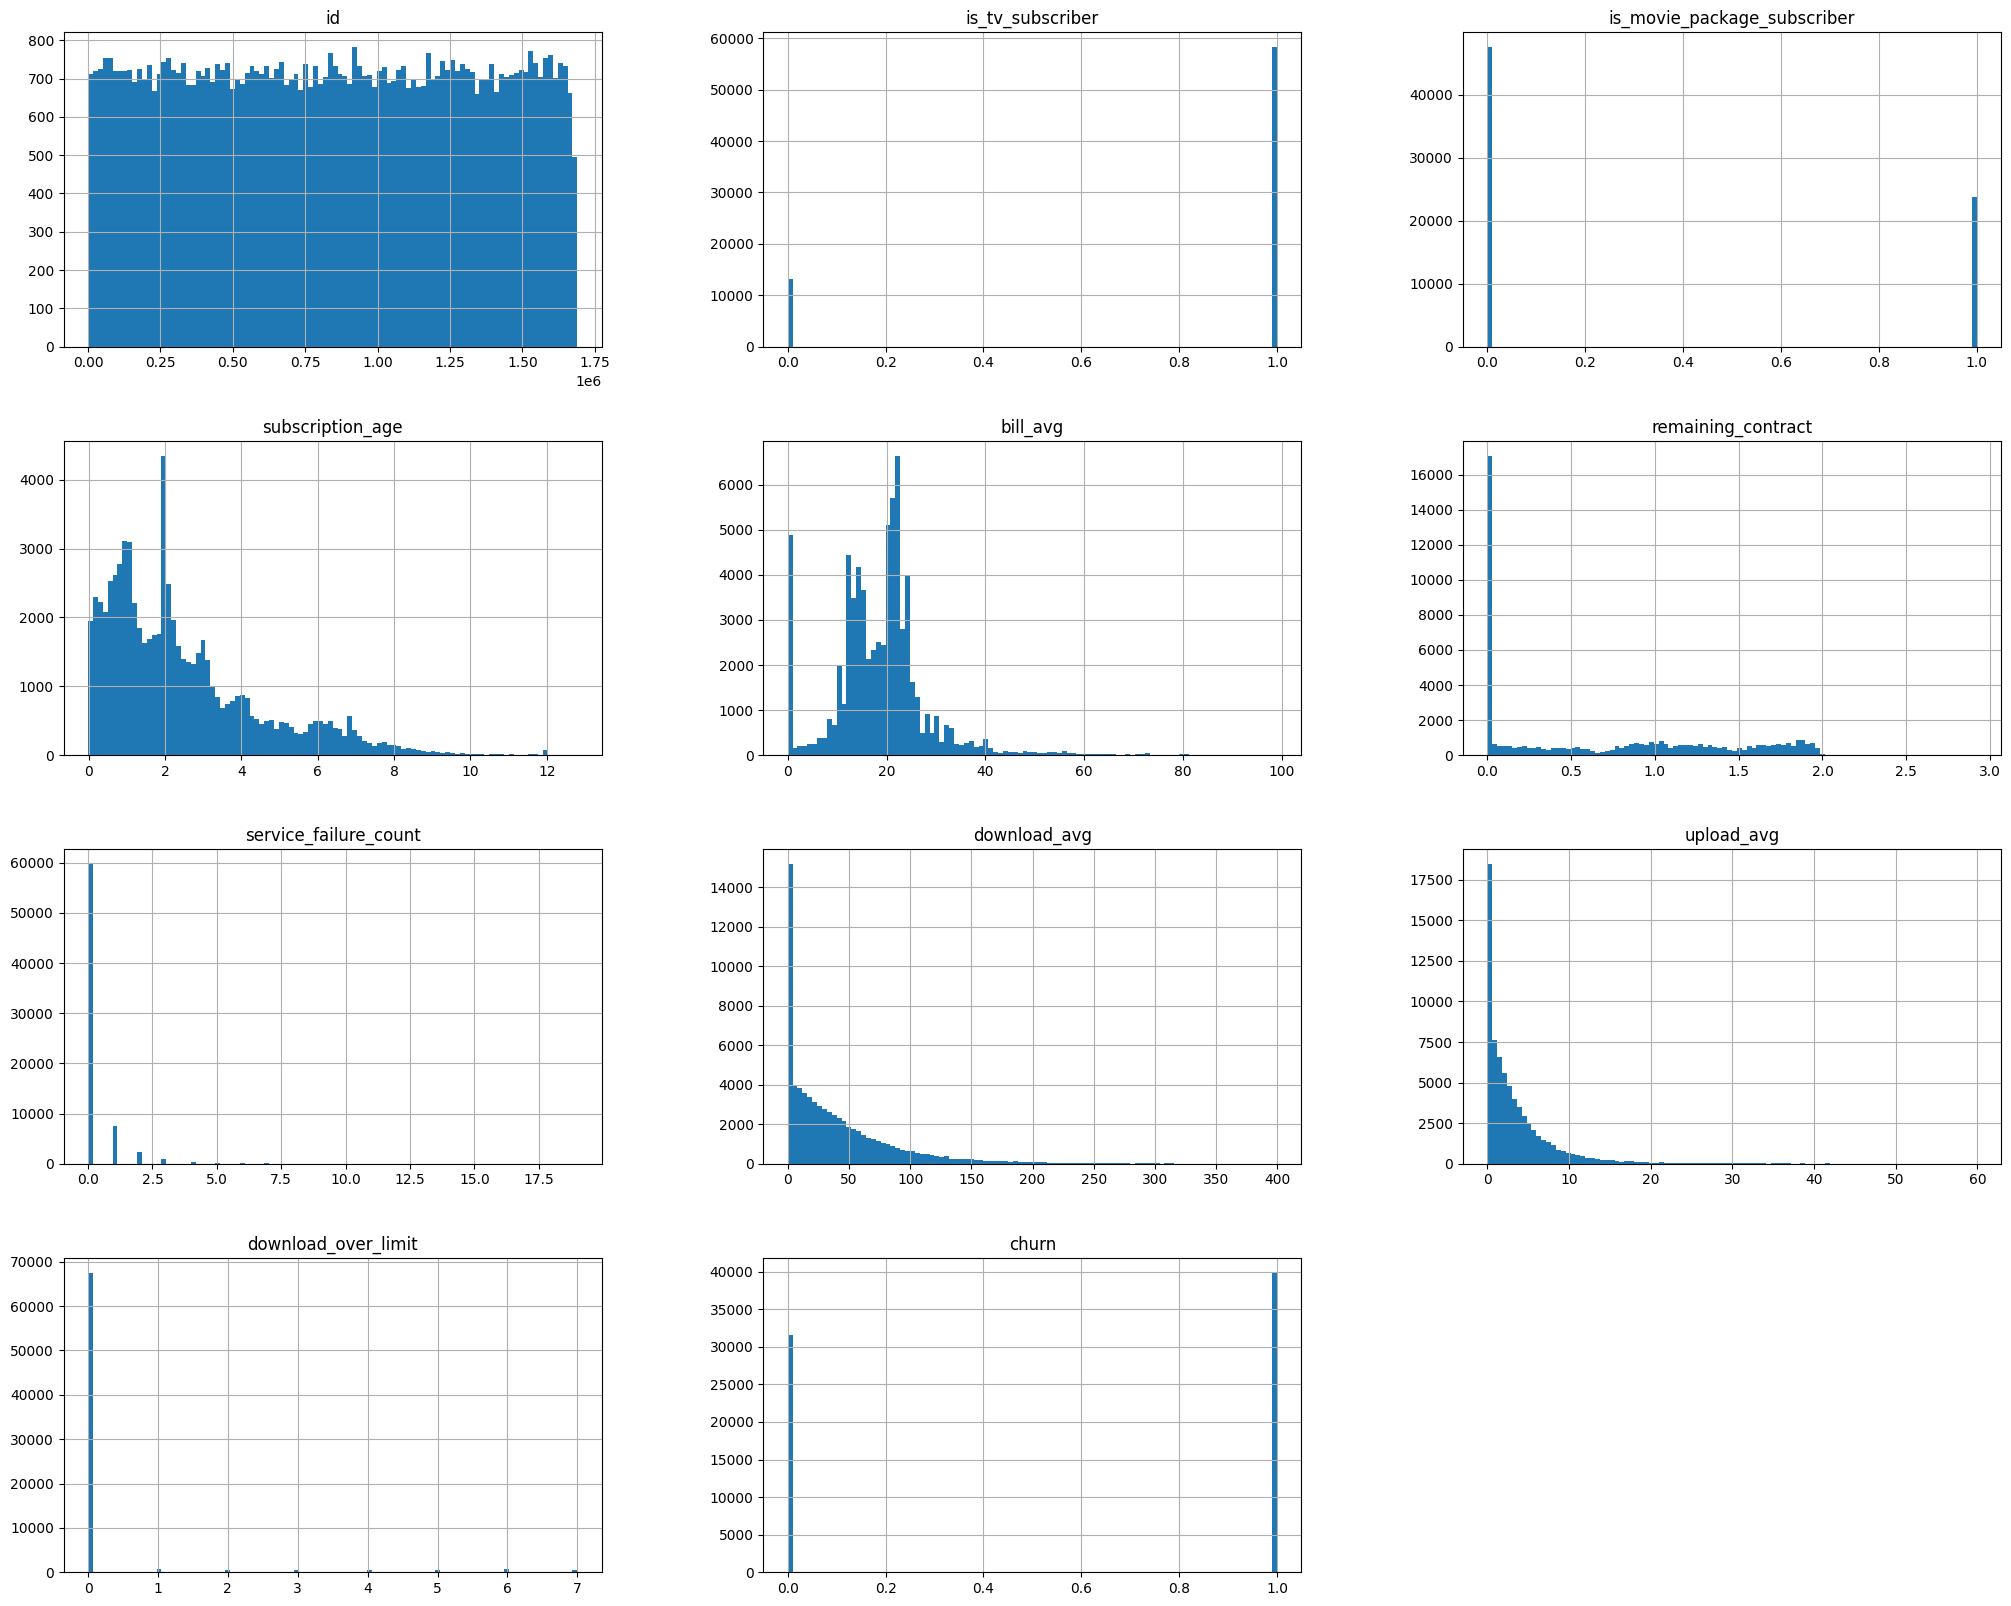

In [ ]:
df_no_out.hist(bins=100, figsize=(25, 20))
plt.show()

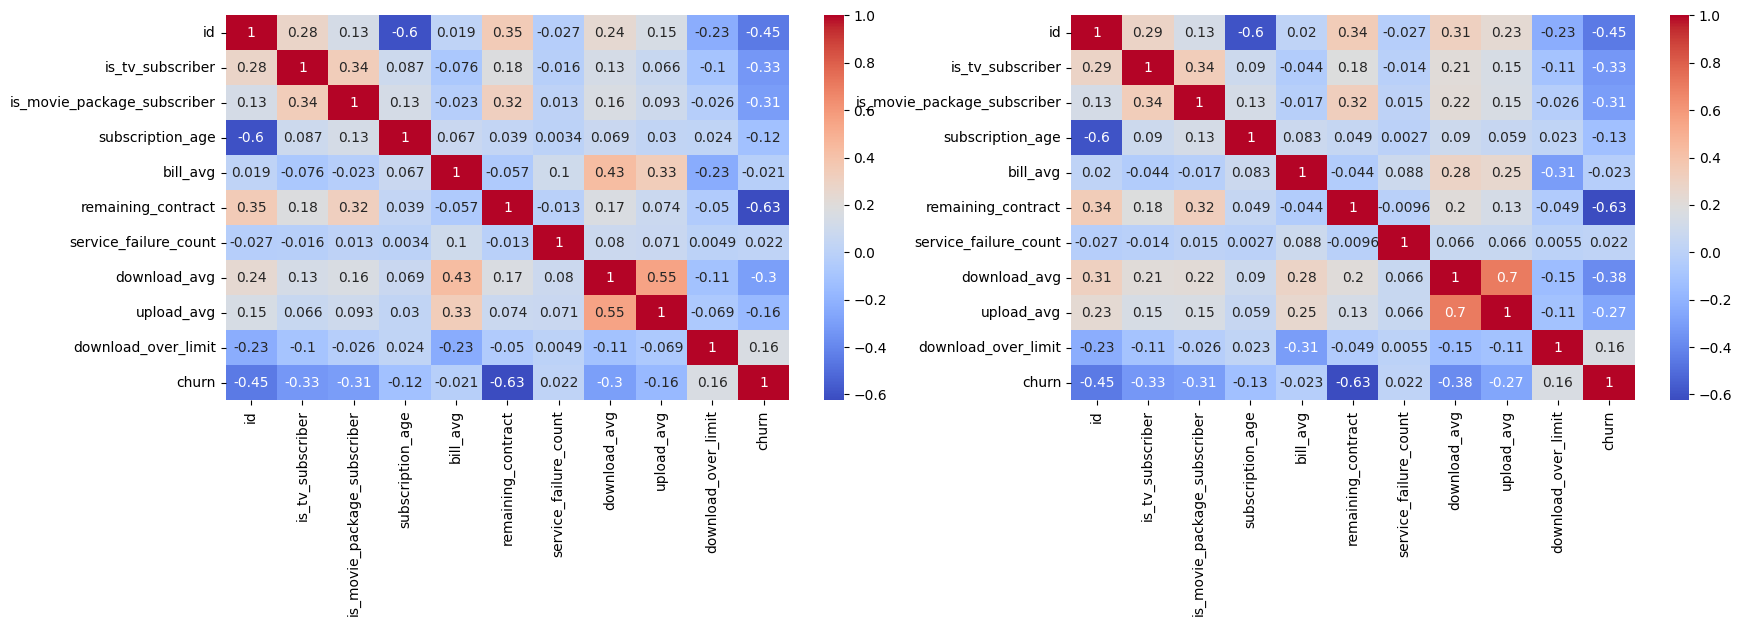

In [ ]:
fns.corr_comparison(df, df_no_out)

Poza zmianą na histogramach (która była do przewidzenia) widać znaczną zmianę w korelacjach cech. Wraz z usuwaniem outlayerów można zaobserwować zwiększanie się korelacji (negatywnej) pomiędzy "download_avg" i "upload_avg" oraz pomiędzy każdą z tych cech, a "churn"

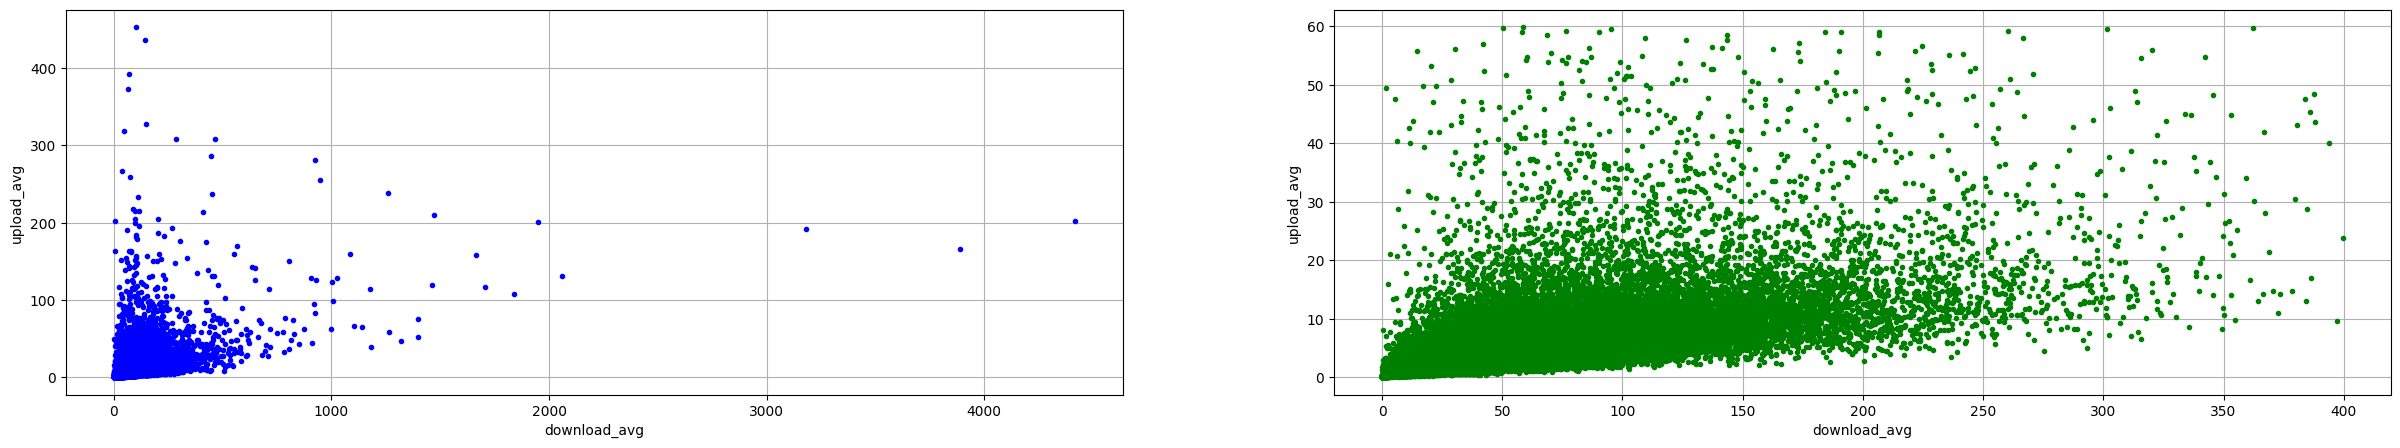

In [ ]:
fns.feat_vs_feat_comparison([df, df_no_out], da, ua)

Raport automatyczny

In [ ]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

Koniec etapu "Wstępna analiza danych".